<a href="https://colab.research.google.com/github/fuyu-quant/Data_Science/blob/main/Data_Science/Optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optuna

In [1]:
%%capture
!pip install optuna

In [2]:
import optuna

## 関数の最適化

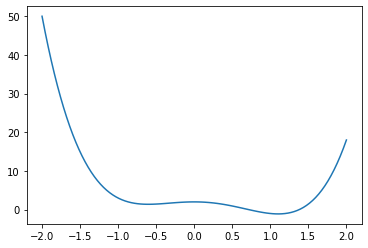

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 100)
plt.figure(0)
plt.plot(x, (3*x**4 - 2*x**3 - 4*x**2 + 2))
plt.show()

In [4]:
# 目的関数の設定
def f(x):
    return (3*x**4 - 2*x**3 - 4*x**2 + 2)

In [5]:
# 目的関数の定義(f(x)をラップするように記述)
def objective(trial): # 引数 (trial) はTrial型の値
    # 最適化する変数とその範囲を選択
    x = trial.suggest_uniform("x", -5, 5)
    # 途中の状態を保存
    ret = f(x) 
    return ret


In [6]:
# 最適化するstudyオブジェクトを定義
study = optuna.create_study(direction="minimize") 
study.optimize(objective, # 目的関数
               n_trials=100 # 実行回数
              )


[I 2022-09-11 13:47:29,021] A new study created in memory with name: no-name-73e0466a-6ffe-46ed-8b5c-7d59e18328f1
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  after removing the cwd from sys.path.
[I 2022-09-11 13:47:29,040] Trial 0 finished with value: 32.76418835904695 and parameters: {'x': -1.8075136225776633}. Best is trial 0 with value: 32.76418835904695.
[I 2022-09-11 13:47:29,046] Trial 1 finished with value: 965.4594991246715 and parameters: {'x': 4.496279257321852}. Best is trial 0 with value: 32.76418835904695.
[I 2022-09-11 13:47:29,051] Trial 2 finished with value: 82.43657353541948 and parameters: {'x': 2.63611614777386}. Best is trial 0 with value: 32.76418835904695.
[I 2022-09-11 13:47:29,063] Trial 3 finished with value: 1670.797963555232

In [7]:
print(study.best_value)
print(study.best_params)

-1.1097315489331225
{'x': 1.107436210048087}


## LightGBMの最適化

In [15]:
import lightgbm as lgbm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [16]:
iris = datasets.load_iris()

data = iris.data
target = iris.target
train_x, test_x, train_y, test_y = train_test_split(data, target, random_state=0)

In [46]:
def objective(trial):
    param = {
        'objective': 'multiclass',
        'num_class': 3,
        # カテゴリの試行を行うパラメータ
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        # 整数値の試行を行うパラメータ
        'num_leavrs': trial.suggest_int('num_leaves', 10, 100),
        # 対数値の試行を行うパラメータ
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        # 連続値の試行を行うパラメータ
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0, 1),
        # 離散値の試行を行うパラメータ(qは試行を行う間隔を調整する)
        #'min_child_samples': trial.suggest_discrete_uniform('min_child_samples', 1, 10, 1)
    }
    
    train_xy = lgbm.Dataset(train_x, train_y)
    val_xy = lgbm.Dataset(test_x, test_y, reference=train_xy)

    gbm = lgbm.train(param, train_xy,valid_sets = val_xy)
    
    pred_proba = gbm.predict(test_x)
    pred = np.argmax(pred_proba, axis=1)
    
    auc = roc_auc_score(test_y, pred_proba, multi_class = 'ovr')
    return auc


study = optuna.create_study(direction='minimize')
optuna.logging.disable_default_handler()
study.optimize(objective, n_trials=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.07576
[2]	valid_0's multi_logloss: 1.03374
[3]	valid_0's multi_logloss: 0.996668
[4]	valid_0's multi_logloss: 0.960109
[5]	valid_0's multi_logloss: 0.929099
[6]	valid_0's multi_logloss: 0.896976
[7]	valid_0's multi_logloss: 0.86982
[8]	valid_0's multi_logloss: 0.881516
[9]	valid_0's multi_logloss: 0.85562
[10]	valid_0's multi_logloss: 0.824405
[11]	valid_0's multi_logloss: 0.800448
[12]	valid_0's multi_logloss: 0.808133
[13]	valid_0's multi_logloss: 0.786018
[14]	valid_0's multi_logloss: 0.758695
[15]	valid_0's multi_logloss: 0.737774
[16]	valid_0's multi_logloss: 0.713012
[17]	valid_0's multi_logloss: 0.694351
[18]	valid_0's multi_logloss: 0.671812
[19]	valid_0's multi_logloss: 0.655109
[20]	valid_0's multi_logloss: 0.634513
[21]	valid_0's multi_logloss: 0.640657
[22]	valid_0's multi_logloss: 0.620772
[23]	valid_0's multi_logloss: 0.607019
[24]	valid_0's multi_logloss: 0.5895
[25]	valid_0's multi_logloss: 0.576353
[26]	valid_0's multi_logloss: 0.560903
[

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[93]	valid_0's multi_logloss: 0.944119
[94]	valid_0's multi_logloss: 0.942729
[95]	valid_0's multi_logloss: 0.94095
[96]	valid_0's multi_logloss: 0.93893
[97]	valid_0's multi_logloss: 0.937589
[98]	valid_0's multi_logloss: 0.936215
[99]	valid_0's multi_logloss: 0.934518
[100]	valid_0's multi_logloss: 0.932518
[1]	valid_0's multi_logloss: 1.11615
[2]	valid_0's multi_logloss: 1.11334
[3]	valid_0's multi_logloss: 1.11064
[4]	valid_0's multi_logloss: 1.10785
[5]	valid_0's multi_logloss: 1.10518
[6]	valid_0's multi_logloss: 1.10242
[7]	valid_0's multi_logloss: 1.09977
[8]	valid_0's multi_logloss: 1.1007
[9]	valid_0's multi_logloss: 1.09807
[10]	valid_0's multi_logloss: 1.09533
[11]	valid_0's multi_logloss: 1.09273
[12]	valid_0's multi_logloss: 1.09357
[13]	valid_0's multi_logloss: 1.09096
[14]	valid_0's multi_logloss: 1.08826
[15]	valid_0's multi_logloss: 1.08568
[16]	valid_0's multi_logloss: 1.08301
[17]	valid_0's multi_logloss: 1.08045
[18]	valid_0's multi_logloss: 1.0778
[19]	valid_0's 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[76]	valid_0's multi_logloss: 1.01037
[77]	valid_0's multi_logloss: 1.01125
[78]	valid_0's multi_logloss: 1.01205
[79]	valid_0's multi_logloss: 1.00981
[80]	valid_0's multi_logloss: 1.00746
[81]	valid_0's multi_logloss: 1.00848
[82]	valid_0's multi_logloss: 1.00614
[83]	valid_0's multi_logloss: 1.00732
[84]	valid_0's multi_logloss: 1.00859
[85]	valid_0's multi_logloss: 1.00976
[86]	valid_0's multi_logloss: 1.00741
[87]	valid_0's multi_logloss: 1.00519
[88]	valid_0's multi_logloss: 1.0066
[89]	valid_0's multi_logloss: 1.00738
[90]	valid_0's multi_logloss: 1.00861
[91]	valid_0's multi_logloss: 1.00787
[92]	valid_0's multi_logloss: 1.00553
[93]	valid_0's multi_logloss: 1.00332
[94]	valid_0's multi_logloss: 1.00453
[95]	valid_0's multi_logloss: 1.00541
[96]	valid_0's multi_logloss: 1.00633
[97]	valid_0's multi_logloss: 1.00412
[98]	valid_0's multi_logloss: 1.00505
[99]	valid_0's multi_logloss: 1.00285
[100]	valid_0's multi_logloss: 1.00052
[1]	valid_0's multi_logloss: 0.810663
[2]	valid_0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[67]	valid_0's multi_logloss: 0.387571
[68]	valid_0's multi_logloss: 0.394286
[69]	valid_0's multi_logloss: 0.400581
[70]	valid_0's multi_logloss: 0.408283
[71]	valid_0's multi_logloss: 0.417235
[72]	valid_0's multi_logloss: 0.416095
[73]	valid_0's multi_logloss: 0.418817
[74]	valid_0's multi_logloss: 0.421885
[75]	valid_0's multi_logloss: 0.429275
[76]	valid_0's multi_logloss: 0.433156
[77]	valid_0's multi_logloss: 0.436547
[78]	valid_0's multi_logloss: 0.440604
[79]	valid_0's multi_logloss: 0.448015
[80]	valid_0's multi_logloss: 0.452057
[81]	valid_0's multi_logloss: 0.457936
[82]	valid_0's multi_logloss: 0.466204
[83]	valid_0's multi_logloss: 0.475947
[84]	valid_0's multi_logloss: 0.474903
[85]	valid_0's multi_logloss: 0.477166
[86]	valid_0's multi_logloss: 0.480158
[87]	valid_0's multi_logloss: 0.487488
[88]	valid_0's multi_logloss: 0.491331
[89]	valid_0's multi_logloss: 0.494567
[90]	valid_0's multi_logloss: 0.498642
[91]	valid_0's multi_logloss: 0.505955
[92]	valid_0's multi_logl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[59]	valid_0's multi_logloss: 0.468098
[60]	valid_0's multi_logloss: 0.462337
[61]	valid_0's multi_logloss: 0.458224
[62]	valid_0's multi_logloss: 0.45265
[63]	valid_0's multi_logloss: 0.448917
[64]	valid_0's multi_logloss: 0.443519
[65]	valid_0's multi_logloss: 0.439769
[66]	valid_0's multi_logloss: 0.434542
[67]	valid_0's multi_logloss: 0.43114
[68]	valid_0's multi_logloss: 0.426073
[69]	valid_0's multi_logloss: 0.422649
[70]	valid_0's multi_logloss: 0.417738
[71]	valid_0's multi_logloss: 0.414467
[72]	valid_0's multi_logloss: 0.409704
[73]	valid_0's multi_logloss: 0.406724
[74]	valid_0's multi_logloss: 0.402101
[75]	valid_0's multi_logloss: 0.399091
[76]	valid_0's multi_logloss: 0.394604
[77]	valid_0's multi_logloss: 0.391838
[78]	valid_0's multi_logloss: 0.387477
[79]	valid_0's multi_logloss: 0.38472
[80]	valid_0's multi_logloss: 0.380485
[81]	valid_0's multi_logloss: 0.377946
[82]	valid_0's multi_logloss: 0.373827
[83]	valid_0's multi_logloss: 0.369863
[84]	valid_0's multi_logloss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[45]	valid_0's multi_logloss: 0.385881
[46]	valid_0's multi_logloss: 0.392502
[47]	valid_0's multi_logloss: 0.385888
[48]	valid_0's multi_logloss: 0.383368
[49]	valid_0's multi_logloss: 0.388633
[50]	valid_0's multi_logloss: 0.39406
[51]	valid_0's multi_logloss: 0.38675
[52]	valid_0's multi_logloss: 0.376114
[53]	valid_0's multi_logloss: 0.379912
[54]	valid_0's multi_logloss: 0.369595
[55]	valid_0's multi_logloss: 0.36402
[56]	valid_0's multi_logloss: 0.371189
[57]	valid_0's multi_logloss: 0.365216
[58]	valid_0's multi_logloss: 0.369306
[59]	valid_0's multi_logloss: 0.375378
[60]	valid_0's multi_logloss: 0.365265
[61]	valid_0's multi_logloss: 0.369148
[62]	valid_0's multi_logloss: 0.359747
[63]	valid_0's multi_logloss: 0.354327
[64]	valid_0's multi_logloss: 0.358821
[65]	valid_0's multi_logloss: 0.363396
[66]	valid_0's multi_logloss: 0.353792
[67]	valid_0's multi_logloss: 0.349001
[68]	valid_0's multi_logloss: 0.340017
[69]	valid_0's multi_logloss: 0.345799
[70]	valid_0's multi_loglos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[34]	valid_0's multi_logloss: 0.911378
[35]	valid_0's multi_logloss: 0.905929
[36]	valid_0's multi_logloss: 0.899514
[37]	valid_0's multi_logloss: 0.895303
[38]	valid_0's multi_logloss: 0.891043
[39]	valid_0's multi_logloss: 0.885793
[40]	valid_0's multi_logloss: 0.879588
[41]	valid_0's multi_logloss: 0.87552
[42]	valid_0's multi_logloss: 0.87142
[43]	valid_0's multi_logloss: 0.866358
[44]	valid_0's multi_logloss: 0.860354
[45]	valid_0's multi_logloss: 0.856422
[46]	valid_0's multi_logloss: 0.852475
[47]	valid_0's multi_logloss: 0.847591
[48]	valid_0's multi_logloss: 0.841778
[49]	valid_0's multi_logloss: 0.837976
[50]	valid_0's multi_logloss: 0.834173
[51]	valid_0's multi_logloss: 0.829459
[52]	valid_0's multi_logloss: 0.823828
[53]	valid_0's multi_logloss: 0.82015
[54]	valid_0's multi_logloss: 0.816485
[55]	valid_0's multi_logloss: 0.811933
[56]	valid_0's multi_logloss: 0.806477
[57]	valid_0's multi_logloss: 0.802917
[58]	valid_0's multi_logloss: 0.799383
[59]	valid_0's multi_logloss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[29]	valid_0's multi_logloss: 0.691046
[30]	valid_0's multi_logloss: 0.678343
[31]	valid_0's multi_logloss: 0.679249
[32]	valid_0's multi_logloss: 0.666854
[33]	valid_0's multi_logloss: 0.65479
[34]	valid_0's multi_logloss: 0.643056
[35]	valid_0's multi_logloss: 0.64931
[36]	valid_0's multi_logloss: 0.658437
[37]	valid_0's multi_logloss: 0.645462
[38]	valid_0's multi_logloss: 0.634152
[39]	valid_0's multi_logloss: 0.622931
[40]	valid_0's multi_logloss: 0.619423
[41]	valid_0's multi_logloss: 0.625976
[42]	valid_0's multi_logloss: 0.614096
[43]	valid_0's multi_logloss: 0.620433
[44]	valid_0's multi_logloss: 0.609691
[45]	valid_0's multi_logloss: 0.59823
[46]	valid_0's multi_logloss: 0.605489
[47]	valid_0's multi_logloss: 0.595108
[48]	valid_0's multi_logloss: 0.593766
[49]	valid_0's multi_logloss: 0.600693
[50]	valid_0's multi_logloss: 0.607977
[51]	valid_0's multi_logloss: 0.598612
[52]	valid_0's multi_logloss: 0.588283
[53]	valid_0's multi_logloss: 0.593146
[54]	valid_0's multi_loglos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[15]	valid_0's multi_logloss: 0.362594
[16]	valid_0's multi_logloss: 0.336136
[17]	valid_0's multi_logloss: 0.321737
[18]	valid_0's multi_logloss: 0.299992
[19]	valid_0's multi_logloss: 0.287533
[20]	valid_0's multi_logloss: 0.269001
[21]	valid_0's multi_logloss: 0.274768
[22]	valid_0's multi_logloss: 0.258031
[23]	valid_0's multi_logloss: 0.248968
[24]	valid_0's multi_logloss: 0.239645
[25]	valid_0's multi_logloss: 0.225282
[26]	valid_0's multi_logloss: 0.213892
[27]	valid_0's multi_logloss: 0.209363
[28]	valid_0's multi_logloss: 0.211673
[29]	valid_0's multi_logloss: 0.200415
[30]	valid_0's multi_logloss: 0.19374
[31]	valid_0's multi_logloss: 0.198174
[32]	valid_0's multi_logloss: 0.19204
[33]	valid_0's multi_logloss: 0.190182
[34]	valid_0's multi_logloss: 0.182113
[35]	valid_0's multi_logloss: 0.185618
[36]	valid_0's multi_logloss: 0.189871
[37]	valid_0's multi_logloss: 0.18788
[38]	valid_0's multi_logloss: 0.180161
[39]	valid_0's multi_logloss: 0.179536
[40]	valid_0's multi_logloss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[9]	valid_0's multi_logloss: 0.208103
[10]	valid_0's multi_logloss: 0.194811
[11]	valid_0's multi_logloss: 0.184907
[12]	valid_0's multi_logloss: 0.180278
[13]	valid_0's multi_logloss: 0.174784
[14]	valid_0's multi_logloss: 0.169497
[15]	valid_0's multi_logloss: 0.167621
[16]	valid_0's multi_logloss: 0.155871
[17]	valid_0's multi_logloss: 0.157302
[18]	valid_0's multi_logloss: 0.156913
[19]	valid_0's multi_logloss: 0.161536
[20]	valid_0's multi_logloss: 0.161929
[21]	valid_0's multi_logloss: 0.162159
[22]	valid_0's multi_logloss: 0.168443
[23]	valid_0's multi_logloss: 0.175847
[24]	valid_0's multi_logloss: 0.173792
[25]	valid_0's multi_logloss: 0.174058
[26]	valid_0's multi_logloss: 0.181635
[27]	valid_0's multi_logloss: 0.189046
[28]	valid_0's multi_logloss: 0.187012
[29]	valid_0's multi_logloss: 0.193679
[30]	valid_0's multi_logloss: 0.200698
[31]	valid_0's multi_logloss: 0.206065
[32]	valid_0's multi_logloss: 0.210739
[33]	valid_0's multi_logloss: 0.210516
[34]	valid_0's multi_logl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11758
[2]	valid_0's multi_logloss: 1.1163
[3]	valid_0's multi_logloss: 1.11501
[4]	valid_0's multi_logloss: 1.11366
[5]	valid_0's multi_logloss: 1.11231
[6]	valid_0's multi_logloss: 1.11099
[7]	valid_0's multi_logloss: 1.10972
[8]	valid_0's multi_logloss: 1.11013
[9]	valid_0's multi_logloss: 1.10885
[10]	valid_0's multi_logloss: 1.10758
[11]	valid_0's multi_logloss: 1.10631
[12]	valid_0's multi_logloss: 1.10674
[13]	valid_0's multi_logloss: 1.10547
[14]	valid_0's multi_logloss: 1.10422
[15]	valid_0's multi_logloss: 1.10297
[16]	valid_0's multi_logloss: 1.1017
[17]	valid_0's multi_logloss: 1.10041
[18]	valid_0's multi_logloss: 1.09908
[19]	valid_0's multi_logloss: 1.09776
[20]	valid_0's multi_logloss: 1.09644
[21]	valid_0's multi_logloss: 1.09676
[22]	valid_0's multi_logloss: 1.09548
[23]	valid_0's multi_logloss: 1.09419
[24]	valid_0's multi_logloss: 1.09289
[25]	valid_0's multi_logloss: 1.09154
[26]	valid_0's multi_logloss: 1.09028
[27]	valid_0's multi_lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be

[1]	valid_0's multi_logloss: 0.762949
[2]	valid_0's multi_logloss: 0.562609
[3]	valid_0's multi_logloss: 0.402683
[4]	valid_0's multi_logloss: 0.286606
[5]	valid_0's multi_logloss: 0.26599
[6]	valid_0's multi_logloss: 0.242437
[7]	valid_0's multi_logloss: 0.214775
[8]	valid_0's multi_logloss: 0.183563
[9]	valid_0's multi_logloss: 0.176056
[10]	valid_0's multi_logloss: 0.169338
[11]	valid_0's multi_logloss: 0.16675
[12]	valid_0's multi_logloss: 0.160057
[13]	valid_0's multi_logloss: 0.160333
[14]	valid_0's multi_logloss: 0.162149
[15]	valid_0's multi_logloss: 0.166832
[16]	valid_0's multi_logloss: 0.167453
[17]	valid_0's multi_logloss: 0.167734
[18]	valid_0's multi_logloss: 0.173876
[19]	valid_0's multi_logloss: 0.181474
[20]	valid_0's multi_logloss: 0.180992
[21]	valid_0's multi_logloss: 0.188272
[22]	valid_0's multi_logloss: 0.191141
[23]	valid_0's multi_logloss: 0.199086
[24]	valid_0's multi_logloss: 0.204515
[25]	valid_0's multi_logloss: 0.212767
[26]	valid_0's multi_logloss: 0.2163

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11217
[2]	valid_0's multi_logloss: 1.10559
[3]	valid_0's multi_logloss: 1.09903
[4]	valid_0's multi_logloss: 1.09215
[5]	valid_0's multi_logloss: 1.08535
[6]	valid_0's multi_logloss: 1.07879
[7]	valid_0's multi_logloss: 1.07247
[8]	valid_0's multi_logloss: 1.06586
[9]	valid_0's multi_logloss: 1.05967
[10]	valid_0's multi_logloss: 1.05355
[11]	valid_0's multi_logloss: 1.04748
[12]	valid_0's multi_logloss: 1.04118
[13]	valid_0's multi_logloss: 1.03523
[14]	valid_0's multi_logloss: 1.0294
[15]	valid_0's multi_logloss: 1.02364
[16]	valid_0's multi_logloss: 1.01786
[17]	valid_0's multi_logloss: 1.01192
[18]	valid_0's multi_logloss: 1.00589
[19]	valid_0's multi_logloss: 0.999906
[20]	valid_0's multi_logloss: 0.993981
[21]	valid_0's multi_logloss: 0.988531
[22]	valid_0's multi_logloss: 0.982841
[23]	valid_0's multi_logloss: 0.977201
[24]	valid_0's multi_logloss: 0.971538
[25]	valid_0's multi_logloss: 0.965637
[26]	valid_0's multi_logloss: 0.960202
[27]	valid_0's

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[87]	valid_0's multi_logloss: 0.6477
[88]	valid_0's multi_logloss: 0.643164
[89]	valid_0's multi_logloss: 0.640541
[90]	valid_0's multi_logloss: 0.63777
[91]	valid_0's multi_logloss: 0.634227
[92]	valid_0's multi_logloss: 0.62983
[93]	valid_0's multi_logloss: 0.627288
[94]	valid_0's multi_logloss: 0.624618
[95]	valid_0's multi_logloss: 0.621067
[96]	valid_0's multi_logloss: 0.616804
[97]	valid_0's multi_logloss: 0.614342
[98]	valid_0's multi_logloss: 0.611767
[99]	valid_0's multi_logloss: 0.608456
[100]	valid_0's multi_logloss: 0.604321
[1]	valid_0's multi_logloss: 0.41854
[2]	valid_0's multi_logloss: 0.195819
[3]	valid_0's multi_logloss: 0.17492
[4]	valid_0's multi_logloss: 0.162567
[5]	valid_0's multi_logloss: 0.14218
[6]	valid_0's multi_logloss: 0.171044
[7]	valid_0's multi_logloss: 0.216282
[8]	valid_0's multi_logloss: 0.199733
[9]	valid_0's multi_logloss: 0.168989
[10]	valid_0's multi_logloss: 0.201155
[11]	valid_0's multi_logloss: 0.210631
[12]	valid_0's multi_logloss: 0.209272
[

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[75]	valid_0's multi_logloss: 0.616465
[76]	valid_0's multi_logloss: 0.61448
[77]	valid_0's multi_logloss: 0.610397
[78]	valid_0's multi_logloss: 0.605426
[79]	valid_0's multi_logloss: 0.634124
[80]	valid_0's multi_logloss: 0.636072
[81]	valid_0's multi_logloss: 0.630592
[82]	valid_0's multi_logloss: 0.635731
[83]	valid_0's multi_logloss: 0.630252
[84]	valid_0's multi_logloss: 0.62244
[85]	valid_0's multi_logloss: 0.614569
[86]	valid_0's multi_logloss: 0.614571
[87]	valid_0's multi_logloss: 0.635299
[88]	valid_0's multi_logloss: 0.625679
[89]	valid_0's multi_logloss: 0.620235
[90]	valid_0's multi_logloss: 0.617745
[91]	valid_0's multi_logloss: 0.610342
[92]	valid_0's multi_logloss: 0.6247
[93]	valid_0's multi_logloss: 0.639329
[94]	valid_0's multi_logloss: 0.630523
[95]	valid_0's multi_logloss: 0.623154
[96]	valid_0's multi_logloss: 0.618161
[97]	valid_0's multi_logloss: 0.627094
[98]	valid_0's multi_logloss: 0.618789
[99]	valid_0's multi_logloss: 0.631063
[100]	valid_0's multi_loglos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[55]	valid_0's multi_logloss: 1.01473
[56]	valid_0's multi_logloss: 1.01647
[57]	valid_0's multi_logloss: 1.01384
[58]	valid_0's multi_logloss: 1.01287
[59]	valid_0's multi_logloss: 1.01437
[60]	valid_0's multi_logloss: 1.01175
[61]	valid_0's multi_logloss: 1.01079
[62]	valid_0's multi_logloss: 1.00812
[63]	valid_0's multi_logloss: 1.00535
[64]	valid_0's multi_logloss: 1.00667
[65]	valid_0's multi_logloss: 1.00814
[66]	valid_0's multi_logloss: 1.00554
[67]	valid_0's multi_logloss: 1.00296
[68]	valid_0's multi_logloss: 1.00029
[69]	valid_0's multi_logloss: 1.00176
[70]	valid_0's multi_logloss: 1.00253
[71]	valid_0's multi_logloss: 1.00335
[72]	valid_0's multi_logloss: 1.00067
[73]	valid_0's multi_logloss: 0.99811
[74]	valid_0's multi_logloss: 0.999318
[75]	valid_0's multi_logloss: 0.996761
[76]	valid_0's multi_logloss: 0.996974
[77]	valid_0's multi_logloss: 0.997993
[78]	valid_0's multi_logloss: 0.998902
[79]	valid_0's multi_logloss: 0.996347
[80]	valid_0's multi_logloss: 0.993803
[81]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[39]	valid_0's multi_logloss: 0.156435
[40]	valid_0's multi_logloss: 0.15625
[41]	valid_0's multi_logloss: 0.157607
[42]	valid_0's multi_logloss: 0.156704
[43]	valid_0's multi_logloss: 0.157641
[44]	valid_0's multi_logloss: 0.159461
[45]	valid_0's multi_logloss: 0.15761
[46]	valid_0's multi_logloss: 0.159882
[47]	valid_0's multi_logloss: 0.1597
[48]	valid_0's multi_logloss: 0.160675
[49]	valid_0's multi_logloss: 0.160295
[50]	valid_0's multi_logloss: 0.161968
[51]	valid_0's multi_logloss: 0.165926
[52]	valid_0's multi_logloss: 0.161219
[53]	valid_0's multi_logloss: 0.162116
[54]	valid_0's multi_logloss: 0.158423
[55]	valid_0's multi_logloss: 0.161969
[56]	valid_0's multi_logloss: 0.162923
[57]	valid_0's multi_logloss: 0.159432
[58]	valid_0's multi_logloss: 0.160357
[59]	valid_0's multi_logloss: 0.161594
[60]	valid_0's multi_logloss: 0.164746
[61]	valid_0's multi_logloss: 0.164496
[62]	valid_0's multi_logloss: 0.160369
[63]	valid_0's multi_logloss: 0.161413
[64]	valid_0's multi_logloss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[23]	valid_0's multi_logloss: 1.09963
[24]	valid_0's multi_logloss: 1.09862
[25]	valid_0's multi_logloss: 1.09765
[26]	valid_0's multi_logloss: 1.09664
[27]	valid_0's multi_logloss: 1.09567
[28]	valid_0's multi_logloss: 1.09599
[29]	valid_0's multi_logloss: 1.09502
[30]	valid_0's multi_logloss: 1.09402
[31]	valid_0's multi_logloss: 1.09404
[32]	valid_0's multi_logloss: 1.09304
[33]	valid_0's multi_logloss: 1.09208
[34]	valid_0's multi_logloss: 1.09108
[35]	valid_0's multi_logloss: 1.09152
[36]	valid_0's multi_logloss: 1.09215
[37]	valid_0's multi_logloss: 1.09119
[38]	valid_0's multi_logloss: 1.09019
[39]	valid_0's multi_logloss: 1.08923
[40]	valid_0's multi_logloss: 1.08891
[41]	valid_0's multi_logloss: 1.08941
[42]	valid_0's multi_logloss: 1.08842
[43]	valid_0's multi_logloss: 1.08889
[44]	valid_0's multi_logloss: 1.0879
[45]	valid_0's multi_logloss: 1.08695
[46]	valid_0's multi_logloss: 1.08482
[47]	valid_0's multi_logloss: 1.08387
[48]	valid_0's multi_logloss: 1.08369
[49]	valid_0'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11813
[2]	valid_0's multi_logloss: 1.11735
[3]	valid_0's multi_logloss: 1.11635
[4]	valid_0's multi_logloss: 1.11526
[5]	valid_0's multi_logloss: 1.11452
[6]	valid_0's multi_logloss: 1.11374
[7]	valid_0's multi_logloss: 1.11275
[8]	valid_0's multi_logloss: 1.11291
[9]	valid_0's multi_logloss: 1.11218
[10]	valid_0's multi_logloss: 1.1114
[11]	valid_0's multi_logloss: 1.11041
[12]	valid_0's multi_logloss: 1.11062
[13]	valid_0's multi_logloss: 1.10989
[14]	valid_0's multi_logloss: 1.10912
[15]	valid_0's multi_logloss: 1.10814
[16]	valid_0's multi_logloss: 1.10705
[17]	valid_0's multi_logloss: 1.10633
[18]	valid_0's multi_logloss: 1.10556
[19]	valid_0's multi_logloss: 1.10458
[20]	valid_0's multi_logloss: 1.1035
[21]	valid_0's multi_logloss: 1.10378
[22]	valid_0's multi_logloss: 1.10302
[23]	valid_0's multi_logloss: 1.10204
[24]	valid_0's multi_logloss: 1.10097
[25]	valid_0's multi_logloss: 1.10025
[26]	valid_0's multi_logloss: 1.09949
[27]	valid_0's multi_lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11679
[2]	valid_0's multi_logloss: 1.11462
[3]	valid_0's multi_logloss: 1.11255
[4]	valid_0's multi_logloss: 1.1104
[5]	valid_0's multi_logloss: 1.10835
[6]	valid_0's multi_logloss: 1.10622
[7]	valid_0's multi_logloss: 1.10417
[8]	valid_0's multi_logloss: 1.10489
[9]	valid_0's multi_logloss: 1.10285
[10]	valid_0's multi_logloss: 1.10074
[11]	valid_0's multi_logloss: 1.09872
[12]	valid_0's multi_logloss: 1.09937
[13]	valid_0's multi_logloss: 1.09735
[14]	valid_0's multi_logloss: 1.09526
[15]	valid_0's multi_logloss: 1.09326
[16]	valid_0's multi_logloss: 1.09118
[17]	valid_0's multi_logloss: 1.08919
[18]	valid_0's multi_logloss: 1.08712
[19]	valid_0's multi_logloss: 1.08515
[20]	valid_0's multi_logloss: 1.08309
[21]	valid_0's multi_logloss: 1.08357
[22]	valid_0's multi_logloss: 1.08152
[23]	valid_0's multi_logloss: 1.07957
[24]	valid_0's multi_logloss: 1.07753
[25]	valid_0's multi_logloss: 1.07559
[26]	valid_0's multi_logloss: 1.07357
[27]	valid_0's multi_l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11621
[2]	valid_0's multi_logloss: 1.11346
[3]	valid_0's multi_logloss: 1.11083
[4]	valid_0's multi_logloss: 1.1081
[5]	valid_0's multi_logloss: 1.10549
[6]	valid_0's multi_logloss: 1.10279
[7]	valid_0's multi_logloss: 1.10021
[8]	valid_0's multi_logloss: 1.10111
[9]	valid_0's multi_logloss: 1.09854
[10]	valid_0's multi_logloss: 1.09586
[11]	valid_0's multi_logloss: 1.09331
[12]	valid_0's multi_logloss: 1.09413
[13]	valid_0's multi_logloss: 1.09159
[14]	valid_0's multi_logloss: 1.08895
[15]	valid_0's multi_logloss: 1.08642
[16]	valid_0's multi_logloss: 1.0838
[17]	valid_0's multi_logloss: 1.0813
[18]	valid_0's multi_logloss: 1.07871
[19]	valid_0's multi_logloss: 1.07623
[20]	valid_0's multi_logloss: 1.07365
[21]	valid_0's multi_logloss: 1.07425
[22]	valid_0's multi_logloss: 1.07169
[23]	valid_0's multi_logloss: 1.06924
[24]	valid_0's multi_logloss: 1.06669
[25]	valid_0's multi_logloss: 1.06427
[26]	valid_0's multi_logloss: 1.06175
[27]	valid_0's multi_log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11486
[2]	valid_0's multi_logloss: 1.11071
[3]	valid_0's multi_logloss: 1.10676
[4]	valid_0's multi_logloss: 1.10266
[5]	valid_0's multi_logloss: 1.09876
[6]	valid_0's multi_logloss: 1.09472
[7]	valid_0's multi_logloss: 1.09088
[8]	valid_0's multi_logloss: 1.09224
[9]	valid_0's multi_logloss: 1.08841
[10]	valid_0's multi_logloss: 1.08444
[11]	valid_0's multi_logloss: 1.08066
[12]	valid_0's multi_logloss: 1.08188
[13]	valid_0's multi_logloss: 1.07812
[14]	valid_0's multi_logloss: 1.07422
[15]	valid_0's multi_logloss: 1.07051
[16]	valid_0's multi_logloss: 1.06666
[17]	valid_0's multi_logloss: 1.063
[18]	valid_0's multi_logloss: 1.05919
[19]	valid_0's multi_logloss: 1.05558
[20]	valid_0's multi_logloss: 1.05183
[21]	valid_0's multi_logloss: 1.05271
[22]	valid_0's multi_logloss: 1.04898
[23]	valid_0's multi_logloss: 1.04543
[24]	valid_0's multi_logloss: 1.04174
[25]	valid_0's multi_logloss: 1.03824
[26]	valid_0's multi_logloss: 1.0346
[27]	valid_0's multi_log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[72]	valid_0's multi_logloss: 1.05794
[73]	valid_0's multi_logloss: 1.05667
[74]	valid_0's multi_logloss: 1.05726
[75]	valid_0's multi_logloss: 1.05599
[76]	valid_0's multi_logloss: 1.05608
[77]	valid_0's multi_logloss: 1.05657
[78]	valid_0's multi_logloss: 1.05701
[79]	valid_0's multi_logloss: 1.05574
[80]	valid_0's multi_logloss: 1.05441
[81]	valid_0's multi_logloss: 1.05498
[82]	valid_0's multi_logloss: 1.05365
[83]	valid_0's multi_logloss: 1.05431
[84]	valid_0's multi_logloss: 1.05502
[85]	valid_0's multi_logloss: 1.05567
[86]	valid_0's multi_logloss: 1.05434
[87]	valid_0's multi_logloss: 1.05308
[88]	valid_0's multi_logloss: 1.05387
[89]	valid_0's multi_logloss: 1.0543
[90]	valid_0's multi_logloss: 1.05499
[91]	valid_0's multi_logloss: 1.05372
[92]	valid_0's multi_logloss: 1.0524
[93]	valid_0's multi_logloss: 1.05114
[94]	valid_0's multi_logloss: 1.05183
[95]	valid_0's multi_logloss: 1.05232
[96]	valid_0's multi_logloss: 1.05284
[97]	valid_0's multi_logloss: 1.05158
[98]	valid_0'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[48]	valid_0's multi_logloss: 0.858568
[49]	valid_0's multi_logloss: 0.862491
[50]	valid_0's multi_logloss: 0.866883
[51]	valid_0's multi_logloss: 0.85991
[52]	valid_0's multi_logloss: 0.851594
[53]	valid_0's multi_logloss: 0.854915
[54]	valid_0's multi_logloss: 0.849477
[55]	valid_0's multi_logloss: 0.842738
[56]	valid_0's multi_logloss: 0.847267
[57]	valid_0's multi_logloss: 0.841902
[58]	valid_0's multi_logloss: 0.843431
[59]	valid_0's multi_logloss: 0.847415
[60]	valid_0's multi_logloss: 0.839294
[61]	valid_0's multi_logloss: 0.840667
[62]	valid_0's multi_logloss: 0.835379
[63]	valid_0's multi_logloss: 0.828593
[64]	valid_0's multi_logloss: 0.831505
[65]	valid_0's multi_logloss: 0.834862
[66]	valid_0's multi_logloss: 0.829646
[67]	valid_0's multi_logloss: 0.822945
[68]	valid_0's multi_logloss: 0.815176
[69]	valid_0's multi_logloss: 0.818596
[70]	valid_0's multi_logloss: 0.82068
[71]	valid_0's multi_logloss: 0.82222
[72]	valid_0's multi_logloss: 0.814474
[73]	valid_0's multi_logloss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[17]	valid_0's multi_logloss: 1.07781
[18]	valid_0's multi_logloss: 1.07498
[19]	valid_0's multi_logloss: 1.07228
[20]	valid_0's multi_logloss: 1.06948
[21]	valid_0's multi_logloss: 1.07013
[22]	valid_0's multi_logloss: 1.06734
[23]	valid_0's multi_logloss: 1.06468
[24]	valid_0's multi_logloss: 1.06191
[25]	valid_0's multi_logloss: 1.05927
[26]	valid_0's multi_logloss: 1.05653
[27]	valid_0's multi_logloss: 1.05392
[28]	valid_0's multi_logloss: 1.05478
[29]	valid_0's multi_logloss: 1.05218
[30]	valid_0's multi_logloss: 1.04947
[31]	valid_0's multi_logloss: 1.04957
[32]	valid_0's multi_logloss: 1.04687
[33]	valid_0's multi_logloss: 1.04431
[34]	valid_0's multi_logloss: 1.04164
[35]	valid_0's multi_logloss: 1.04285
[36]	valid_0's multi_logloss: 1.04455
[37]	valid_0's multi_logloss: 1.04199
[38]	valid_0's multi_logloss: 1.03933
[39]	valid_0's multi_logloss: 1.0368
[40]	valid_0's multi_logloss: 1.03595
[41]	valid_0's multi_logloss: 1.03732
[42]	valid_0's multi_logloss: 1.03468
[43]	valid_0'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11731
[2]	valid_0's multi_logloss: 1.1157
[3]	valid_0's multi_logloss: 1.11415
[4]	valid_0's multi_logloss: 1.11254
[5]	valid_0's multi_logloss: 1.111
[6]	valid_0's multi_logloss: 1.10941
[7]	valid_0's multi_logloss: 1.10787
[8]	valid_0's multi_logloss: 1.10841
[9]	valid_0's multi_logloss: 1.10688
[10]	valid_0's multi_logloss: 1.10529
[11]	valid_0's multi_logloss: 1.10377
[12]	valid_0's multi_logloss: 1.10426
[13]	valid_0's multi_logloss: 1.10274
[14]	valid_0's multi_logloss: 1.10117
[15]	valid_0's multi_logloss: 1.09966
[16]	valid_0's multi_logloss: 1.09809
[17]	valid_0's multi_logloss: 1.09659
[18]	valid_0's multi_logloss: 1.09503
[19]	valid_0's multi_logloss: 1.09353
[20]	valid_0's multi_logloss: 1.09198
[21]	valid_0's multi_logloss: 1.09234
[22]	valid_0's multi_logloss: 1.09079
[23]	valid_0's multi_logloss: 1.0893
[24]	valid_0's multi_logloss: 1.08776
[25]	valid_0's multi_logloss: 1.08629
[26]	valid_0's multi_logloss: 1.08475
[27]	valid_0's multi_logl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[78]	valid_0's multi_logloss: 1.0549
[79]	valid_0's multi_logloss: 1.05359
[80]	valid_0's multi_logloss: 1.05221
[81]	valid_0's multi_logloss: 1.0528
[82]	valid_0's multi_logloss: 1.05142
[83]	valid_0's multi_logloss: 1.0521
[84]	valid_0's multi_logloss: 1.05284
[85]	valid_0's multi_logloss: 1.05351
[86]	valid_0's multi_logloss: 1.05214
[87]	valid_0's multi_logloss: 1.05083
[88]	valid_0's multi_logloss: 1.05165
[89]	valid_0's multi_logloss: 1.0521
[90]	valid_0's multi_logloss: 1.05281
[91]	valid_0's multi_logloss: 1.05157
[92]	valid_0's multi_logloss: 1.0502
[93]	valid_0's multi_logloss: 1.0489
[94]	valid_0's multi_logloss: 1.04961
[95]	valid_0's multi_logloss: 1.05011
[96]	valid_0's multi_logloss: 1.05065
[97]	valid_0's multi_logloss: 1.04935
[98]	valid_0's multi_logloss: 1.04989
[99]	valid_0's multi_logloss: 1.04859
[100]	valid_0's multi_logloss: 1.04722
[1]	valid_0's multi_logloss: 1.1159
[2]	valid_0's multi_logloss: 1.11275
[3]	valid_0's multi_logloss: 1.10877
[4]	valid_0's multi_l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[62]	valid_0's multi_logloss: 0.994714
[63]	valid_0's multi_logloss: 0.991445
[64]	valid_0's multi_logloss: 0.992768
[65]	valid_0's multi_logloss: 0.994388
[66]	valid_0's multi_logloss: 0.991825
[67]	valid_0's multi_logloss: 0.988574
[68]	valid_0's multi_logloss: 0.984907
[69]	valid_0's multi_logloss: 0.986531
[70]	valid_0's multi_logloss: 0.987473
[71]	valid_0's multi_logloss: 0.988079
[72]	valid_0's multi_logloss: 0.984416
[73]	valid_0's multi_logloss: 0.981973
[74]	valid_0's multi_logloss: 0.98336
[75]	valid_0's multi_logloss: 0.980151
[76]	valid_0's multi_logloss: 0.98038
[77]	valid_0's multi_logloss: 0.981624
[78]	valid_0's multi_logloss: 0.982729
[79]	valid_0's multi_logloss: 0.979525
[80]	valid_0's multi_logloss: 0.975909
[81]	valid_0's multi_logloss: 0.977368
[82]	valid_0's multi_logloss: 0.974871
[83]	valid_0's multi_logloss: 0.976496
[84]	valid_0's multi_logloss: 0.977978
[85]	valid_0's multi_logloss: 0.979465
[86]	valid_0's multi_logloss: 0.976962
[87]	valid_0's multi_loglos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[45]	valid_0's multi_logloss: 0.785533
[46]	valid_0's multi_logloss: 0.789549
[47]	valid_0's multi_logloss: 0.782264
[48]	valid_0's multi_logloss: 0.780483
[49]	valid_0's multi_logloss: 0.785096
[50]	valid_0's multi_logloss: 0.789993
[51]	valid_0's multi_logloss: 0.782973
[52]	valid_0's multi_logloss: 0.774158
[53]	valid_0's multi_logloss: 0.777705
[54]	valid_0's multi_logloss: 0.76899
[55]	valid_0's multi_logloss: 0.761982
[56]	valid_0's multi_logloss: 0.767584
[57]	valid_0's multi_logloss: 0.760636
[58]	valid_0's multi_logloss: 0.763348
[59]	valid_0's multi_logloss: 0.768158
[60]	valid_0's multi_logloss: 0.759598
[61]	valid_0's multi_logloss: 0.761672
[62]	valid_0's multi_logloss: 0.754261
[63]	valid_0's multi_logloss: 0.747417
[64]	valid_0's multi_logloss: 0.751234
[65]	valid_0's multi_logloss: 0.755518
[66]	valid_0's multi_logloss: 0.747183
[67]	valid_0's multi_logloss: 0.740713
[68]	valid_0's multi_logloss: 0.732634
[69]	valid_0's multi_logloss: 0.737655
[70]	valid_0's multi_loglo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[24]	valid_0's multi_logloss: 0.981235
[25]	valid_0's multi_logloss: 0.974591
[26]	valid_0's multi_logloss: 0.968476
[27]	valid_0's multi_logloss: 0.962267
[28]	valid_0's multi_logloss: 0.964491
[29]	valid_0's multi_logloss: 0.958647
[30]	valid_0's multi_logloss: 0.952865
[31]	valid_0's multi_logloss: 0.953081
[32]	valid_0's multi_logloss: 0.94696
[33]	valid_0's multi_logloss: 0.940898
[34]	valid_0's multi_logloss: 0.935287
[35]	valid_0's multi_logloss: 0.938173
[36]	valid_0's multi_logloss: 0.942241
[37]	valid_0's multi_logloss: 0.936693
[38]	valid_0's multi_logloss: 0.931203
[39]	valid_0's multi_logloss: 0.925303
[40]	valid_0's multi_logloss: 0.923352
[41]	valid_0's multi_logloss: 0.92645
[42]	valid_0's multi_logloss: 0.920788
[43]	valid_0's multi_logloss: 0.923658
[44]	valid_0's multi_logloss: 0.918218
[45]	valid_0's multi_logloss: 0.912633
[46]	valid_0's multi_logloss: 0.914389
[47]	valid_0's multi_logloss: 0.908715
[48]	valid_0's multi_logloss: 0.907842
[49]	valid_0's multi_loglos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[20]	valid_0's multi_logloss: 1.09258
[21]	valid_0's multi_logloss: 1.09293
[22]	valid_0's multi_logloss: 1.09141
[23]	valid_0's multi_logloss: 1.08996
[24]	valid_0's multi_logloss: 1.08845
[25]	valid_0's multi_logloss: 1.08701
[26]	valid_0's multi_logloss: 1.08551
[27]	valid_0's multi_logloss: 1.08407
[28]	valid_0's multi_logloss: 1.08454
[29]	valid_0's multi_logloss: 1.08311
[30]	valid_0's multi_logloss: 1.08162
[31]	valid_0's multi_logloss: 1.08166
[32]	valid_0's multi_logloss: 1.08017
[33]	valid_0's multi_logloss: 1.07875
[34]	valid_0's multi_logloss: 1.07727
[35]	valid_0's multi_logloss: 1.07793
[36]	valid_0's multi_logloss: 1.07886
[37]	valid_0's multi_logloss: 1.07744
[38]	valid_0's multi_logloss: 1.07596
[39]	valid_0's multi_logloss: 1.07455
[40]	valid_0's multi_logloss: 1.07407
[41]	valid_0's multi_logloss: 1.07482
[42]	valid_0's multi_logloss: 1.07335
[43]	valid_0's multi_logloss: 1.07406
[44]	valid_0's multi_logloss: 1.07259
[45]	valid_0's multi_logloss: 1.07118
[46]	valid_0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11574
[2]	valid_0's multi_logloss: 1.1125
[3]	valid_0's multi_logloss: 1.1094
[4]	valid_0's multi_logloss: 1.10619
[5]	valid_0's multi_logloss: 1.10313
[6]	valid_0's multi_logloss: 1.09995
[7]	valid_0's multi_logloss: 1.09692
[8]	valid_0's multi_logloss: 1.09799
[9]	valid_0's multi_logloss: 1.09497
[10]	valid_0's multi_logloss: 1.09184
[11]	valid_0's multi_logloss: 1.08885
[12]	valid_0's multi_logloss: 1.08981
[13]	valid_0's multi_logloss: 1.08684
[14]	valid_0's multi_logloss: 1.08375
[15]	valid_0's multi_logloss: 1.0808
[16]	valid_0's multi_logloss: 1.07774
[17]	valid_0's multi_logloss: 1.07483
[18]	valid_0's multi_logloss: 1.0718
[19]	valid_0's multi_logloss: 1.06892
[20]	valid_0's multi_logloss: 1.06592
[21]	valid_0's multi_logloss: 1.06662
[22]	valid_0's multi_logloss: 1.06363
[23]	valid_0's multi_logloss: 1.06079
[24]	valid_0's multi_logloss: 1.05783
[25]	valid_0's multi_logloss: 1.05502
[26]	valid_0's multi_logloss: 1.05209
[27]	valid_0's multi_logl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11564
[2]	valid_0's multi_logloss: 1.1123
[3]	valid_0's multi_logloss: 1.10911
[4]	valid_0's multi_logloss: 1.10581
[5]	valid_0's multi_logloss: 1.10265
[6]	valid_0's multi_logloss: 1.09938
[7]	valid_0's multi_logloss: 1.09626
[8]	valid_0's multi_logloss: 1.09736
[9]	valid_0's multi_logloss: 1.09425
[10]	valid_0's multi_logloss: 1.09103
[11]	valid_0's multi_logloss: 1.08796
[12]	valid_0's multi_logloss: 1.08895
[13]	valid_0's multi_logloss: 1.08588
[14]	valid_0's multi_logloss: 1.0827
[15]	valid_0's multi_logloss: 1.07967
[16]	valid_0's multi_logloss: 1.07653
[17]	valid_0's multi_logloss: 1.07353
[18]	valid_0's multi_logloss: 1.07041
[19]	valid_0's multi_logloss: 1.06745
[20]	valid_0's multi_logloss: 1.06437
[21]	valid_0's multi_logloss: 1.06509
[22]	valid_0's multi_logloss: 1.06202
[23]	valid_0's multi_logloss: 1.0591
[24]	valid_0's multi_logloss: 1.05606
[25]	valid_0's multi_logloss: 1.05317
[26]	valid_0's multi_logloss: 1.05016
[27]	valid_0's multi_log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[84]	valid_0's multi_logloss: 0.917888
[85]	valid_0's multi_logloss: 0.919992
[86]	valid_0's multi_logloss: 0.91583
[87]	valid_0's multi_logloss: 0.912094
[88]	valid_0's multi_logloss: 0.914593
[89]	valid_0's multi_logloss: 0.916037
[90]	valid_0's multi_logloss: 0.918246
[91]	valid_0's multi_logloss: 0.918474
[92]	valid_0's multi_logloss: 0.914323
[93]	valid_0's multi_logloss: 0.910605
[94]	valid_0's multi_logloss: 0.912673
[95]	valid_0's multi_logloss: 0.914246
[96]	valid_0's multi_logloss: 0.915882
[97]	valid_0's multi_logloss: 0.912153
[98]	valid_0's multi_logloss: 0.913845
[99]	valid_0's multi_logloss: 0.910133
[100]	valid_0's multi_logloss: 0.90605
[1]	valid_0's multi_logloss: 1.11606
[2]	valid_0's multi_logloss: 1.11315
[3]	valid_0's multi_logloss: 1.11037
[4]	valid_0's multi_logloss: 1.10749
[5]	valid_0's multi_logloss: 1.10474
[6]	valid_0's multi_logloss: 1.10188
[7]	valid_0's multi_logloss: 1.09916
[8]	valid_0's multi_logloss: 1.10012
[9]	valid_0's multi_logloss: 1.0974
[10]	v

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[54]	valid_0's multi_logloss: 1.02639
[55]	valid_0's multi_logloss: 1.02401
[56]	valid_0's multi_logloss: 1.02563
[57]	valid_0's multi_logloss: 1.02326
[58]	valid_0's multi_logloss: 1.02207
[59]	valid_0's multi_logloss: 1.02345
[60]	valid_0's multi_logloss: 1.02097
[61]	valid_0's multi_logloss: 1.01988
[62]	valid_0's multi_logloss: 1.01741
[63]	valid_0's multi_logloss: 1.01508
[64]	valid_0's multi_logloss: 1.01621
[65]	valid_0's multi_logloss: 1.01753
[66]	valid_0's multi_logloss: 1.01507
[67]	valid_0's multi_logloss: 1.01275
[68]	valid_0's multi_logloss: 1.01031
[69]	valid_0's multi_logloss: 1.01171
[70]	valid_0's multi_logloss: 1.01243
[71]	valid_0's multi_logloss: 1.01319
[72]	valid_0's multi_logloss: 1.01075
[73]	valid_0's multi_logloss: 1.00844
[74]	valid_0's multi_logloss: 1.00952
[75]	valid_0's multi_logloss: 1.00722
[76]	valid_0's multi_logloss: 1.00739
[77]	valid_0's multi_logloss: 1.00829
[78]	valid_0's multi_logloss: 1.00911
[79]	valid_0's multi_logloss: 1.00681
[80]	valid_0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[26]	valid_0's multi_logloss: 0.517225
[27]	valid_0's multi_logloss: 0.502303
[28]	valid_0's multi_logloss: 0.505815
[29]	valid_0's multi_logloss: 0.494899
[30]	valid_0's multi_logloss: 0.484753
[31]	valid_0's multi_logloss: 0.488613
[32]	valid_0's multi_logloss: 0.470486
[33]	valid_0's multi_logloss: 0.460757
[34]	valid_0's multi_logloss: 0.451952
[35]	valid_0's multi_logloss: 0.456355
[36]	valid_0's multi_logloss: 0.465166
[37]	valid_0's multi_logloss: 0.455649
[38]	valid_0's multi_logloss: 0.447133
[39]	valid_0's multi_logloss: 0.435061
[40]	valid_0's multi_logloss: 0.431083
[41]	valid_0's multi_logloss: 0.438743
[42]	valid_0's multi_logloss: 0.431276
[43]	valid_0's multi_logloss: 0.437011
[44]	valid_0's multi_logloss: 0.421721
[45]	valid_0's multi_logloss: 0.413565
[46]	valid_0's multi_logloss: 0.421463
[47]	valid_0's multi_logloss: 0.41053
[48]	valid_0's multi_logloss: 0.408022
[49]	valid_0's multi_logloss: 0.414962
[50]	valid_0's multi_logloss: 0.422366
[51]	valid_0's multi_loglo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[6]	valid_0's multi_logloss: 1.09873
[7]	valid_0's multi_logloss: 1.0955
[8]	valid_0's multi_logloss: 1.09664
[9]	valid_0's multi_logloss: 1.09343
[10]	valid_0's multi_logloss: 1.0901
[11]	valid_0's multi_logloss: 1.08693
[12]	valid_0's multi_logloss: 1.08795
[13]	valid_0's multi_logloss: 1.08479
[14]	valid_0's multi_logloss: 1.08151
[15]	valid_0's multi_logloss: 1.07838
[16]	valid_0's multi_logloss: 1.07513
[17]	valid_0's multi_logloss: 1.07204
[18]	valid_0's multi_logloss: 1.06883
[19]	valid_0's multi_logloss: 1.06577
[20]	valid_0's multi_logloss: 1.06259
[21]	valid_0's multi_logloss: 1.06334
[22]	valid_0's multi_logloss: 1.06017
[23]	valid_0's multi_logloss: 1.05716
[24]	valid_0's multi_logloss: 1.05403
[25]	valid_0's multi_logloss: 1.05105
[26]	valid_0's multi_logloss: 1.04796
[27]	valid_0's multi_logloss: 1.04501
[28]	valid_0's multi_logloss: 1.04599
[29]	valid_0's multi_logloss: 1.04305
[30]	valid_0's multi_logloss: 1.04
[31]	valid_0's multi_logloss: 1.04012
[32]	valid_0's multi_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.09361
[2]	valid_0's multi_logloss: 1.0678
[3]	valid_0's multi_logloss: 1.03628
[4]	valid_0's multi_logloss: 1.00256
[5]	valid_0's multi_logloss: 0.98126
[6]	valid_0's multi_logloss: 0.959884
[7]	valid_0's multi_logloss: 0.933543
[8]	valid_0's multi_logloss: 0.937973
[9]	valid_0's multi_logloss: 0.918799
[10]	valid_0's multi_logloss: 0.899609
[11]	valid_0's multi_logloss: 0.876797
[12]	valid_0's multi_logloss: 0.88158
[13]	valid_0's multi_logloss: 0.864188
[14]	valid_0's multi_logloss: 0.847073
[15]	valid_0's multi_logloss: 0.826473
[16]	valid_0's multi_logloss: 0.802301
[17]	valid_0's multi_logloss: 0.787262
[18]	valid_0's multi_logloss: 0.772684
[19]	valid_0's multi_logloss: 0.754946
[20]	valid_0's multi_logloss: 0.733797
[21]	valid_0's multi_logloss: 0.739891
[22]	valid_0's multi_logloss: 0.726887
[23]	valid_0's multi_logloss: 0.710306
[24]	valid_0's multi_logloss: 0.690965
[25]	valid_0's multi_logloss: 0.680157
[26]	valid_0's multi_logloss: 0.668929
[2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[64]	valid_0's multi_logloss: 0.615276
[65]	valid_0's multi_logloss: 0.611589
[66]	valid_0's multi_logloss: 0.607751
[67]	valid_0's multi_logloss: 0.602794
[68]	valid_0's multi_logloss: 0.596661
[69]	valid_0's multi_logloss: 0.593141
[70]	valid_0's multi_logloss: 0.589506
[71]	valid_0's multi_logloss: 0.584614
[72]	valid_0's multi_logloss: 0.578753
[73]	valid_0's multi_logloss: 0.57539
[74]	valid_0's multi_logloss: 0.571908
[75]	valid_0's multi_logloss: 0.567414
[76]	valid_0's multi_logloss: 0.56181
[77]	valid_0's multi_logloss: 0.558596
[78]	valid_0's multi_logloss: 0.555295
[79]	valid_0's multi_logloss: 0.550854
[80]	valid_0's multi_logloss: 0.545494
[81]	valid_0's multi_logloss: 0.542421
[82]	valid_0's multi_logloss: 0.539394
[83]	valid_0's multi_logloss: 0.535308
[84]	valid_0's multi_logloss: 0.530175
[85]	valid_0's multi_logloss: 0.527233
[86]	valid_0's multi_logloss: 0.524495
[87]	valid_0's multi_logloss: 0.52045
[88]	valid_0's multi_logloss: 0.515532
[89]	valid_0's multi_logloss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[47]	valid_0's multi_logloss: 0.91878
[48]	valid_0's multi_logloss: 0.917926
[49]	valid_0's multi_logloss: 0.920968
[50]	valid_0's multi_logloss: 0.924101
[51]	valid_0's multi_logloss: 0.91925
[52]	valid_0's multi_logloss: 0.913951
[53]	valid_0's multi_logloss: 0.916192
[54]	valid_0's multi_logloss: 0.910929
[55]	valid_0's multi_logloss: 0.9062
[56]	valid_0's multi_logloss: 0.909735
[57]	valid_0's multi_logloss: 0.905028
[58]	valid_0's multi_logloss: 0.905735
[59]	valid_0's multi_logloss: 0.908815
[60]	valid_0's multi_logloss: 0.903628
[61]	valid_0's multi_logloss: 0.904041
[62]	valid_0's multi_logloss: 0.898904
[63]	valid_0's multi_logloss: 0.894311
[64]	valid_0's multi_logloss: 0.896718
[65]	valid_0's multi_logloss: 0.89949
[66]	valid_0's multi_logloss: 0.894402
[67]	valid_0's multi_logloss: 0.889853
[68]	valid_0's multi_logloss: 0.884865
[69]	valid_0's multi_logloss: 0.887864
[70]	valid_0's multi_logloss: 0.88941
[71]	valid_0's multi_logloss: 0.891231
[72]	valid_0's multi_logloss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[25]	valid_0's multi_logloss: 1.04789
[26]	valid_0's multi_logloss: 1.04466
[27]	valid_0's multi_logloss: 1.04159
[28]	valid_0's multi_logloss: 1.04261
[29]	valid_0's multi_logloss: 1.03955
[30]	valid_0's multi_logloss: 1.03636
[31]	valid_0's multi_logloss: 1.03649
[32]	valid_0's multi_logloss: 1.03332
[33]	valid_0's multi_logloss: 1.03031
[34]	valid_0's multi_logloss: 1.02717
[35]	valid_0's multi_logloss: 1.02859
[36]	valid_0's multi_logloss: 1.03061
[37]	valid_0's multi_logloss: 1.02761
[38]	valid_0's multi_logloss: 1.02449
[39]	valid_0's multi_logloss: 1.02153
[40]	valid_0's multi_logloss: 1.02054
[41]	valid_0's multi_logloss: 1.02215
[42]	valid_0's multi_logloss: 1.01906
[43]	valid_0's multi_logloss: 1.02058
[44]	valid_0's multi_logloss: 1.01749
[45]	valid_0's multi_logloss: 1.01457
[46]	valid_0's multi_logloss: 1.01404
[47]	valid_0's multi_logloss: 1.01114
[48]	valid_0's multi_logloss: 1.01062
[49]	valid_0's multi_logloss: 1.01231
[50]	valid_0's multi_logloss: 1.01409
[51]	valid_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[3]	valid_0's multi_logloss: 1.10812
[4]	valid_0's multi_logloss: 1.10448
[5]	valid_0's multi_logloss: 1.10101
[6]	valid_0's multi_logloss: 1.09742
[7]	valid_0's multi_logloss: 1.09399
[8]	valid_0's multi_logloss: 1.0952
[9]	valid_0's multi_logloss: 1.09179
[10]	valid_0's multi_logloss: 1.08824
[11]	valid_0's multi_logloss: 1.08487
[12]	valid_0's multi_logloss: 1.08596
[13]	valid_0's multi_logloss: 1.0826
[14]	valid_0's multi_logloss: 1.07912
[15]	valid_0's multi_logloss: 1.0758
[16]	valid_0's multi_logloss: 1.07235
[17]	valid_0's multi_logloss: 1.06907
[18]	valid_0's multi_logloss: 1.06566
[19]	valid_0's multi_logloss: 1.06242
[20]	valid_0's multi_logloss: 1.05905
[21]	valid_0's multi_logloss: 1.05985
[22]	valid_0's multi_logloss: 1.05649
[23]	valid_0's multi_logloss: 1.0533
[24]	valid_0's multi_logloss: 1.04999
[25]	valid_0's multi_logloss: 1.04684
[26]	valid_0's multi_logloss: 1.04356
[27]	valid_0's multi_logloss: 1.04044
[28]	valid_0's multi_logloss: 1.04148
[29]	valid_0's multi_l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[81]	valid_0's multi_logloss: 1.00851
[82]	valid_0's multi_logloss: 1.00617
[83]	valid_0's multi_logloss: 1.00735
[84]	valid_0's multi_logloss: 1.00862
[85]	valid_0's multi_logloss: 1.00978
[86]	valid_0's multi_logloss: 1.00744
[87]	valid_0's multi_logloss: 1.00522
[88]	valid_0's multi_logloss: 1.00663
[89]	valid_0's multi_logloss: 1.00741
[90]	valid_0's multi_logloss: 1.00864
[91]	valid_0's multi_logloss: 1.0079
[92]	valid_0's multi_logloss: 1.00556
[93]	valid_0's multi_logloss: 1.00335
[94]	valid_0's multi_logloss: 1.00456
[95]	valid_0's multi_logloss: 1.00544
[96]	valid_0's multi_logloss: 1.00636
[97]	valid_0's multi_logloss: 1.00415
[98]	valid_0's multi_logloss: 1.00508
[99]	valid_0's multi_logloss: 1.00288
[100]	valid_0's multi_logloss: 1.00055
[1]	valid_0's multi_logloss: 1.11211
[2]	valid_0's multi_logloss: 1.10549
[3]	valid_0's multi_logloss: 1.09887
[4]	valid_0's multi_logloss: 1.09195
[5]	valid_0's multi_logloss: 1.08509
[6]	valid_0's multi_logloss: 1.07848
[7]	valid_0's mult

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[70]	valid_0's multi_logloss: 0.895725
[71]	valid_0's multi_logloss: 0.897381
[72]	valid_0's multi_logloss: 0.892443
[73]	valid_0's multi_logloss: 0.887787
[74]	valid_0's multi_logloss: 0.890039
[75]	valid_0's multi_logloss: 0.885407
[76]	valid_0's multi_logloss: 0.885829
[77]	valid_0's multi_logloss: 0.887755
[78]	valid_0's multi_logloss: 0.8895
[79]	valid_0's multi_logloss: 0.884876
[80]	valid_0's multi_logloss: 0.880294
[81]	valid_0's multi_logloss: 0.882446
[82]	valid_0's multi_logloss: 0.877695
[83]	valid_0's multi_logloss: 0.880267
[84]	valid_0's multi_logloss: 0.882929
[85]	valid_0's multi_logloss: 0.88541
[86]	valid_0's multi_logloss: 0.880208
[87]	valid_0's multi_logloss: 0.875049
[88]	valid_0's multi_logloss: 0.878091
[89]	valid_0's multi_logloss: 0.879822
[90]	valid_0's multi_logloss: 0.882474
[91]	valid_0's multi_logloss: 0.883086
[92]	valid_0's multi_logloss: 0.878509
[93]	valid_0's multi_logloss: 0.874033
[94]	valid_0's multi_logloss: 0.876541
[95]	valid_0's multi_loglos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[47]	valid_0's multi_logloss: 1.05894
[48]	valid_0's multi_logloss: 1.05863
[49]	valid_0's multi_logloss: 1.05957
[50]	valid_0's multi_logloss: 1.06057
[51]	valid_0's multi_logloss: 1.05892
[52]	valid_0's multi_logloss: 1.0572
[53]	valid_0's multi_logloss: 1.05788
[54]	valid_0's multi_logloss: 1.05617
[55]	valid_0's multi_logloss: 1.05454
[56]	valid_0's multi_logloss: 1.05563
[57]	valid_0's multi_logloss: 1.054
[58]	valid_0's multi_logloss: 1.0523
[59]	valid_0's multi_logloss: 1.05323
[60]	valid_0's multi_logloss: 1.05153
[61]	valid_0's multi_logloss: 1.05005
[62]	valid_0's multi_logloss: 1.04836
[63]	valid_0's multi_logloss: 1.04675
[64]	valid_0's multi_logloss: 1.04752
[65]	valid_0's multi_logloss: 1.04842
[66]	valid_0's multi_logloss: 1.04673
[67]	valid_0's multi_logloss: 1.04513
[68]	valid_0's multi_logloss: 1.04346
[69]	valid_0's multi_logloss: 1.04441
[70]	valid_0's multi_logloss: 1.04489
[71]	valid_0's multi_logloss: 1.0454
[72]	valid_0's multi_logloss: 1.04372
[73]	valid_0's mu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[20]	valid_0's multi_logloss: 0.242658
[21]	valid_0's multi_logloss: 0.2351
[22]	valid_0's multi_logloss: 0.223113
[23]	valid_0's multi_logloss: 0.212634
[24]	valid_0's multi_logloss: 0.202872
[25]	valid_0's multi_logloss: 0.196917
[26]	valid_0's multi_logloss: 0.19216
[27]	valid_0's multi_logloss: 0.189008
[28]	valid_0's multi_logloss: 0.185306
[29]	valid_0's multi_logloss: 0.182359
[30]	valid_0's multi_logloss: 0.180197
[31]	valid_0's multi_logloss: 0.176655
[32]	valid_0's multi_logloss: 0.173198
[33]	valid_0's multi_logloss: 0.172345
[34]	valid_0's multi_logloss: 0.169459
[35]	valid_0's multi_logloss: 0.168872
[36]	valid_0's multi_logloss: 0.168696
[37]	valid_0's multi_logloss: 0.167746
[38]	valid_0's multi_logloss: 0.165085
[39]	valid_0's multi_logloss: 0.163847
[40]	valid_0's multi_logloss: 0.162017
[41]	valid_0's multi_logloss: 0.162724
[42]	valid_0's multi_logloss: 0.16197
[43]	valid_0's multi_logloss: 0.161159
[44]	valid_0's multi_logloss: 0.160461
[45]	valid_0's multi_logloss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.09913
[2]	valid_0's multi_logloss: 1.0788
[3]	valid_0's multi_logloss: 1.05375
[4]	valid_0's multi_logloss: 1.02676
[5]	valid_0's multi_logloss: 1.00949
[6]	valid_0's multi_logloss: 0.991956
[7]	valid_0's multi_logloss: 0.970217
[8]	valid_0's multi_logloss: 0.973828
[9]	valid_0's multi_logloss: 0.957945
[10]	valid_0's multi_logloss: 0.941861
[11]	valid_0's multi_logloss: 0.921934
[12]	valid_0's multi_logloss: 0.926198
[13]	valid_0's multi_logloss: 0.911516
[14]	valid_0's multi_logloss: 0.896848
[15]	valid_0's multi_logloss: 0.879155
[16]	valid_0's multi_logloss: 0.858498
[17]	valid_0's multi_logloss: 0.845441
[18]	valid_0's multi_logloss: 0.832556
[19]	valid_0's multi_logloss: 0.816892
[20]	valid_0's multi_logloss: 0.798364
[21]	valid_0's multi_logloss: 0.803614
[22]	valid_0's multi_logloss: 0.791874
[23]	valid_0's multi_logloss: 0.777506
[24]	valid_0's multi_logloss: 0.760272
[25]	valid_0's multi_logloss: 0.749382
[26]	valid_0's multi_logloss: 0.738972
[

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[63]	valid_0's multi_logloss: 0.909163
[64]	valid_0's multi_logloss: 0.911419
[65]	valid_0's multi_logloss: 0.914029
[66]	valid_0's multi_logloss: 0.909229
[67]	valid_0's multi_logloss: 0.904929
[68]	valid_0's multi_logloss: 0.900217
[69]	valid_0's multi_logloss: 0.903037
[70]	valid_0's multi_logloss: 0.904489
[71]	valid_0's multi_logloss: 0.906185
[72]	valid_0's multi_logloss: 0.90146
[73]	valid_0's multi_logloss: 0.89723
[74]	valid_0's multi_logloss: 0.899288
[75]	valid_0's multi_logloss: 0.895085
[76]	valid_0's multi_logloss: 0.895396
[77]	valid_0's multi_logloss: 0.89716
[78]	valid_0's multi_logloss: 0.898785
[79]	valid_0's multi_logloss: 0.894585
[80]	valid_0's multi_logloss: 0.88997
[81]	valid_0's multi_logloss: 0.892055
[82]	valid_0's multi_logloss: 0.887465
[83]	valid_0's multi_logloss: 0.8899
[84]	valid_0's multi_logloss: 0.892429
[85]	valid_0's multi_logloss: 0.894765
[86]	valid_0's multi_logloss: 0.89015
[87]	valid_0's multi_logloss: 0.886024
[88]	valid_0's multi_logloss: 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[38]	valid_0's multi_logloss: 0.821634
[39]	valid_0's multi_logloss: 0.815992
[40]	valid_0's multi_logloss: 0.809256
[41]	valid_0's multi_logloss: 0.803771
[42]	valid_0's multi_logloss: 0.79719
[43]	valid_0's multi_logloss: 0.791847
[44]	valid_0's multi_logloss: 0.785416
[45]	valid_0's multi_logloss: 0.780428
[46]	valid_0's multi_logloss: 0.774142
[47]	valid_0's multi_logloss: 0.769073
[48]	valid_0's multi_logloss: 0.762928
[49]	valid_0's multi_logloss: 0.757991
[50]	valid_0's multi_logloss: 0.751981
[51]	valid_0's multi_logloss: 0.747089
[52]	valid_0's multi_logloss: 0.741213
[53]	valid_0's multi_logloss: 0.73664
[54]	valid_0's multi_logloss: 0.730892
[55]	valid_0's multi_logloss: 0.726323
[56]	valid_0's multi_logloss: 0.720698
[57]	valid_0's multi_logloss: 0.716173
[58]	valid_0's multi_logloss: 0.710669
[59]	valid_0's multi_logloss: 0.706256
[60]	valid_0's multi_logloss: 0.700869
[61]	valid_0's multi_logloss: 0.696568
[62]	valid_0's multi_logloss: 0.691295
[63]	valid_0's multi_loglo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[12]	valid_0's multi_logloss: 1.06672
[13]	valid_0's multi_logloss: 1.06144
[14]	valid_0's multi_logloss: 1.05627
[15]	valid_0's multi_logloss: 1.05114
[16]	valid_0's multi_logloss: 1.046
[17]	valid_0's multi_logloss: 1.04073
[18]	valid_0's multi_logloss: 1.03535
[19]	valid_0's multi_logloss: 1.03003
[20]	valid_0's multi_logloss: 1.02474
[21]	valid_0's multi_logloss: 1.0261
[22]	valid_0's multi_logloss: 1.02097
[23]	valid_0's multi_logloss: 1.01588
[24]	valid_0's multi_logloss: 1.01075
[25]	valid_0's multi_logloss: 1.00543
[26]	valid_0's multi_logloss: 1.00051
[27]	valid_0's multi_logloss: 0.995492
[28]	valid_0's multi_logloss: 0.997266
[29]	valid_0's multi_logloss: 0.99253
[30]	valid_0's multi_logloss: 0.987833
[31]	valid_0's multi_logloss: 0.987977
[32]	valid_0's multi_logloss: 0.983011
[33]	valid_0's multi_logloss: 0.978082
[34]	valid_0's multi_logloss: 0.973494
[35]	valid_0's multi_logloss: 0.975812
[36]	valid_0's multi_logloss: 0.979071
[37]	valid_0's multi_logloss: 0.974534
[38]	

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11563
[2]	valid_0's multi_logloss: 1.11227
[3]	valid_0's multi_logloss: 1.10906
[4]	valid_0's multi_logloss: 1.10573
[5]	valid_0's multi_logloss: 1.10256
[6]	valid_0's multi_logloss: 1.09927
[7]	valid_0's multi_logloss: 1.09613
[8]	valid_0's multi_logloss: 1.09724
[9]	valid_0's multi_logloss: 1.09411
[10]	valid_0's multi_logloss: 1.09087
[11]	valid_0's multi_logloss: 1.08778
[12]	valid_0's multi_logloss: 1.08877
[13]	valid_0's multi_logloss: 1.08569
[14]	valid_0's multi_logloss: 1.0825
[15]	valid_0's multi_logloss: 1.07945
[16]	valid_0's multi_logloss: 1.07628
[17]	valid_0's multi_logloss: 1.07327
[18]	valid_0's multi_logloss: 1.07014
[19]	valid_0's multi_logloss: 1.06716
[20]	valid_0's multi_logloss: 1.06406
[21]	valid_0's multi_logloss: 1.06479
[22]	valid_0's multi_logloss: 1.0617
[23]	valid_0's multi_logloss: 1.05876
[24]	valid_0's multi_logloss: 1.05571
[25]	valid_0's multi_logloss: 1.0528
[26]	valid_0's multi_logloss: 1.04978
[27]	valid_0's multi_log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[82]	valid_0's multi_logloss: 1.00547
[83]	valid_0's multi_logloss: 1.00666
[84]	valid_0's multi_logloss: 1.00793
[85]	valid_0's multi_logloss: 1.00911
[86]	valid_0's multi_logloss: 1.00674
[87]	valid_0's multi_logloss: 1.00451
[88]	valid_0's multi_logloss: 1.00594
[89]	valid_0's multi_logloss: 1.00672
[90]	valid_0's multi_logloss: 1.00796
[91]	valid_0's multi_logloss: 1.00722
[92]	valid_0's multi_logloss: 1.00487
[93]	valid_0's multi_logloss: 1.00265
[94]	valid_0's multi_logloss: 1.00386
[95]	valid_0's multi_logloss: 1.00474
[96]	valid_0's multi_logloss: 1.00568
[97]	valid_0's multi_logloss: 1.00345
[98]	valid_0's multi_logloss: 1.00439
[99]	valid_0's multi_logloss: 1.00217
[100]	valid_0's multi_logloss: 0.999835
[1]	valid_0's multi_logloss: 1.11773
[2]	valid_0's multi_logloss: 1.11655
[3]	valid_0's multi_logloss: 1.11541
[4]	valid_0's multi_logloss: 1.11423
[5]	valid_0's multi_logloss: 1.1131
[6]	valid_0's multi_logloss: 1.11193
[7]	valid_0's multi_logloss: 1.1108
[8]	valid_0's multi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[63]	valid_0's multi_logloss: 1.06994
[64]	valid_0's multi_logloss: 1.07043
[65]	valid_0's multi_logloss: 1.07102
[66]	valid_0's multi_logloss: 1.06992
[67]	valid_0's multi_logloss: 1.06888
[68]	valid_0's multi_logloss: 1.06779
[69]	valid_0's multi_logloss: 1.0684
[70]	valid_0's multi_logloss: 1.06871
[71]	valid_0's multi_logloss: 1.06904
[72]	valid_0's multi_logloss: 1.06794
[73]	valid_0's multi_logloss: 1.0669
[74]	valid_0's multi_logloss: 1.06738
[75]	valid_0's multi_logloss: 1.06635
[76]	valid_0's multi_logloss: 1.06642
[77]	valid_0's multi_logloss: 1.06682
[78]	valid_0's multi_logloss: 1.06717
[79]	valid_0's multi_logloss: 1.06613
[80]	valid_0's multi_logloss: 1.06505
[81]	valid_0's multi_logloss: 1.06551
[82]	valid_0's multi_logloss: 1.06442
[83]	valid_0's multi_logloss: 1.06496
[84]	valid_0's multi_logloss: 1.06554
[85]	valid_0's multi_logloss: 1.06607
[86]	valid_0's multi_logloss: 1.06498
[87]	valid_0's multi_logloss: 1.06395
[88]	valid_0's multi_logloss: 1.0646
[89]	valid_0's 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[45]	valid_0's multi_logloss: 1.05163
[46]	valid_0's multi_logloss: 1.05029
[47]	valid_0's multi_logloss: 1.04836
[48]	valid_0's multi_logloss: 1.04799
[49]	valid_0's multi_logloss: 1.04911
[50]	valid_0's multi_logloss: 1.05028
[51]	valid_0's multi_logloss: 1.04835
[52]	valid_0's multi_logloss: 1.04633
[53]	valid_0's multi_logloss: 1.04713
[54]	valid_0's multi_logloss: 1.04512
[55]	valid_0's multi_logloss: 1.0432
[56]	valid_0's multi_logloss: 1.0445
[57]	valid_0's multi_logloss: 1.04258
[58]	valid_0's multi_logloss: 1.04107
[59]	valid_0's multi_logloss: 1.04217
[60]	valid_0's multi_logloss: 1.04017
[61]	valid_0's multi_logloss: 1.03884
[62]	valid_0's multi_logloss: 1.03686
[63]	valid_0's multi_logloss: 1.03497
[64]	valid_0's multi_logloss: 1.03588
[65]	valid_0's multi_logloss: 1.03694
[66]	valid_0's multi_logloss: 1.03496
[67]	valid_0's multi_logloss: 1.03309
[68]	valid_0's multi_logloss: 1.03112
[69]	valid_0's multi_logloss: 1.03224
[70]	valid_0's multi_logloss: 1.03281
[71]	valid_0's

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[26]	valid_0's multi_logloss: 1.07614
[27]	valid_0's multi_logloss: 1.07431
[28]	valid_0's multi_logloss: 1.07491
[29]	valid_0's multi_logloss: 1.07309
[30]	valid_0's multi_logloss: 1.0712
[31]	valid_0's multi_logloss: 1.07126
[32]	valid_0's multi_logloss: 1.06937
[33]	valid_0's multi_logloss: 1.06757
[34]	valid_0's multi_logloss: 1.0657
[35]	valid_0's multi_logloss: 1.06654
[36]	valid_0's multi_logloss: 1.06772
[37]	valid_0's multi_logloss: 1.06592
[38]	valid_0's multi_logloss: 1.06405
[39]	valid_0's multi_logloss: 1.06227
[40]	valid_0's multi_logloss: 1.06166
[41]	valid_0's multi_logloss: 1.06262
[42]	valid_0's multi_logloss: 1.06076
[43]	valid_0's multi_logloss: 1.06166
[44]	valid_0's multi_logloss: 1.0598
[45]	valid_0's multi_logloss: 1.05803
[46]	valid_0's multi_logloss: 1.05655
[47]	valid_0's multi_logloss: 1.05479
[48]	valid_0's multi_logloss: 1.05446
[49]	valid_0's multi_logloss: 1.05547
[50]	valid_0's multi_logloss: 1.05653
[51]	valid_0's multi_logloss: 1.05477
[52]	valid_0's 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[3]	valid_0's multi_logloss: 1.10698
[4]	valid_0's multi_logloss: 1.10183
[5]	valid_0's multi_logloss: 1.0984
[6]	valid_0's multi_logloss: 1.0948
[7]	valid_0's multi_logloss: 1.09023
[8]	valid_0's multi_logloss: 1.09095
[9]	valid_0's multi_logloss: 1.08758
[10]	valid_0's multi_logloss: 1.08404
[11]	valid_0's multi_logloss: 1.07955
[12]	valid_0's multi_logloss: 1.0805
[13]	valid_0's multi_logloss: 1.07718
[14]	valid_0's multi_logloss: 1.0737
[15]	valid_0's multi_logloss: 1.06929
[16]	valid_0's multi_logloss: 1.0644
[17]	valid_0's multi_logloss: 1.06115
[18]	valid_0's multi_logloss: 1.05776
[19]	valid_0's multi_logloss: 1.05346
[20]	valid_0's multi_logloss: 1.04868
[21]	valid_0's multi_logloss: 1.04994
[22]	valid_0's multi_logloss: 1.04661
[23]	valid_0's multi_logloss: 1.04239
[24]	valid_0's multi_logloss: 1.03769
[25]	valid_0's multi_logloss: 1.03456
[26]	valid_0's multi_logloss: 1.03132
[27]	valid_0's multi_logloss: 1.0272
[28]	valid_0's multi_logloss: 1.02815
[29]	valid_0's multi_logl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[73]	valid_0's multi_logloss: 1.00034
[74]	valid_0's multi_logloss: 1.00154
[75]	valid_0's multi_logloss: 0.998752
[76]	valid_0's multi_logloss: 0.99895
[77]	valid_0's multi_logloss: 1.00003
[78]	valid_0's multi_logloss: 1.00098
[79]	valid_0's multi_logloss: 0.998188
[80]	valid_0's multi_logloss: 0.99505
[81]	valid_0's multi_logloss: 0.99631
[82]	valid_0's multi_logloss: 0.994132
[83]	valid_0's multi_logloss: 0.995534
[84]	valid_0's multi_logloss: 0.996817
[85]	valid_0's multi_logloss: 0.998105
[86]	valid_0's multi_logloss: 0.995923
[87]	valid_0's multi_logloss: 0.99316
[88]	valid_0's multi_logloss: 0.9947
[89]	valid_0's multi_logloss: 0.995719
[90]	valid_0's multi_logloss: 0.997073
[91]	valid_0's multi_logloss: 0.996291
[92]	valid_0's multi_logloss: 0.993166
[93]	valid_0's multi_logloss: 0.991074
[94]	valid_0's multi_logloss: 0.992621
[95]	valid_0's multi_logloss: 0.993598
[96]	valid_0's multi_logloss: 0.994527
[97]	valid_0's multi_logloss: 0.992433
[98]	valid_0's multi_logloss: 0.99

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[37]	valid_0's multi_logloss: 0.866655
[38]	valid_0's multi_logloss: 0.860421
[39]	valid_0's multi_logloss: 0.855471
[40]	valid_0's multi_logloss: 0.849363
[41]	valid_0's multi_logloss: 0.844529
[42]	valid_0's multi_logloss: 0.838543
[43]	valid_0's multi_logloss: 0.83382
[44]	valid_0's multi_logloss: 0.827954
[45]	valid_0's multi_logloss: 0.823138
[46]	valid_0's multi_logloss: 0.817388
[47]	valid_0's multi_logloss: 0.812682
[48]	valid_0's multi_logloss: 0.807045
[49]	valid_0's multi_logloss: 0.802445
[50]	valid_0's multi_logloss: 0.796918
[51]	valid_0's multi_logloss: 0.792607
[52]	valid_0's multi_logloss: 0.787186
[53]	valid_0's multi_logloss: 0.782788
[54]	valid_0's multi_logloss: 0.77747
[55]	valid_0's multi_logloss: 0.773169
[56]	valid_0's multi_logloss: 0.767952
[57]	valid_0's multi_logloss: 0.763746
[58]	valid_0's multi_logloss: 0.758626
[59]	valid_0's multi_logloss: 0.754681
[60]	valid_0's multi_logloss: 0.749656
[61]	valid_0's multi_logloss: 0.745562
[62]	valid_0's multi_loglos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[17]	valid_0's multi_logloss: 1.04103
[18]	valid_0's multi_logloss: 1.03583
[19]	valid_0's multi_logloss: 1.03092
[20]	valid_0's multi_logloss: 1.02582
[21]	valid_0's multi_logloss: 1.02704
[22]	valid_0's multi_logloss: 1.02197
[23]	valid_0's multi_logloss: 1.01718
[24]	valid_0's multi_logloss: 1.0122
[25]	valid_0's multi_logloss: 1.0075
[26]	valid_0's multi_logloss: 1.0026
[27]	valid_0's multi_logloss: 0.997983
[28]	valid_0's multi_logloss: 0.999535
[29]	valid_0's multi_logloss: 0.994947
[30]	valid_0's multi_logloss: 0.990158
[31]	valid_0's multi_logloss: 0.990408
[32]	valid_0's multi_logloss: 0.985659
[33]	valid_0's multi_logloss: 0.981359
[34]	valid_0's multi_logloss: 0.976689
[35]	valid_0's multi_logloss: 0.978876
[36]	valid_0's multi_logloss: 0.981907
[37]	valid_0's multi_logloss: 0.977639
[38]	valid_0's multi_logloss: 0.973003
[39]	valid_0's multi_logloss: 0.968808
[40]	valid_0's multi_logloss: 0.967375
[41]	valid_0's multi_logloss: 0.969811
[42]	valid_0's multi_logloss: 0.965242

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[78]	valid_0's multi_logloss: 0.990677
[79]	valid_0's multi_logloss: 0.988102
[80]	valid_0's multi_logloss: 0.985285
[81]	valid_0's multi_logloss: 0.986518
[82]	valid_0's multi_logloss: 0.98371
[83]	valid_0's multi_logloss: 0.985131
[84]	valid_0's multi_logloss: 0.986659
[85]	valid_0's multi_logloss: 0.988058
[86]	valid_0's multi_logloss: 0.985242
[87]	valid_0's multi_logloss: 0.982692
[88]	valid_0's multi_logloss: 0.98438
[89]	valid_0's multi_logloss: 0.985336
[90]	valid_0's multi_logloss: 0.986809
[91]	valid_0's multi_logloss: 0.986322
[92]	valid_0's multi_logloss: 0.983514
[93]	valid_0's multi_logloss: 0.980975
[94]	valid_0's multi_logloss: 0.982386
[95]	valid_0's multi_logloss: 0.983438
[96]	valid_0's multi_logloss: 0.984534
[97]	valid_0's multi_logloss: 0.981991
[98]	valid_0's multi_logloss: 0.983116
[99]	valid_0's multi_logloss: 0.980582
[100]	valid_0's multi_logloss: 0.977804
[1]	valid_0's multi_logloss: 1.11769
[2]	valid_0's multi_logloss: 1.11645
[3]	valid_0's multi_logloss: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[55]	valid_0's multi_logloss: 1.07526
[56]	valid_0's multi_logloss: 1.07599
[57]	valid_0's multi_logloss: 1.0749
[58]	valid_0's multi_logloss: 1.07284
[59]	valid_0's multi_logloss: 1.07346
[60]	valid_0's multi_logloss: 1.07231
[61]	valid_0's multi_logloss: 1.07056
[62]	valid_0's multi_logloss: 1.06942
[63]	valid_0's multi_logloss: 1.06833
[64]	valid_0's multi_logloss: 1.06884
[65]	valid_0's multi_logloss: 1.06945
[66]	valid_0's multi_logloss: 1.06831
[67]	valid_0's multi_logloss: 1.06723
[68]	valid_0's multi_logloss: 1.0661
[69]	valid_0's multi_logloss: 1.06673
[70]	valid_0's multi_logloss: 1.06706
[71]	valid_0's multi_logloss: 1.0674
[72]	valid_0's multi_logloss: 1.06626
[73]	valid_0's multi_logloss: 1.06518
[74]	valid_0's multi_logloss: 1.06568
[75]	valid_0's multi_logloss: 1.06461
[76]	valid_0's multi_logloss: 1.06468
[77]	valid_0's multi_logloss: 1.06509
[78]	valid_0's multi_logloss: 1.06546
[79]	valid_0's multi_logloss: 1.06439
[80]	valid_0's multi_logloss: 1.06326
[81]	valid_0's 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[40]	valid_0's multi_logloss: 1.04707
[41]	valid_0's multi_logloss: 1.04826
[42]	valid_0's multi_logloss: 1.04596
[43]	valid_0's multi_logloss: 1.04708
[44]	valid_0's multi_logloss: 1.04478
[45]	valid_0's multi_logloss: 1.04259
[46]	valid_0's multi_logloss: 1.04145
[47]	valid_0's multi_logloss: 1.03927
[48]	valid_0's multi_logloss: 1.03887
[49]	valid_0's multi_logloss: 1.04013
[50]	valid_0's multi_logloss: 1.04145
[51]	valid_0's multi_logloss: 1.03927
[52]	valid_0's multi_logloss: 1.037
[53]	valid_0's multi_logloss: 1.03791
[54]	valid_0's multi_logloss: 1.03564
[55]	valid_0's multi_logloss: 1.03349
[56]	valid_0's multi_logloss: 1.03495
[57]	valid_0's multi_logloss: 1.0328
[58]	valid_0's multi_logloss: 1.03145
[59]	valid_0's multi_logloss: 1.0327
[60]	valid_0's multi_logloss: 1.03045
[61]	valid_0's multi_logloss: 1.02924
[62]	valid_0's multi_logloss: 1.02701
[63]	valid_0's multi_logloss: 1.0249
[64]	valid_0's multi_logloss: 1.02592
[65]	valid_0's multi_logloss: 1.02711
[66]	valid_0's m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[19]	valid_0's multi_logloss: 1.08961
[20]	valid_0's multi_logloss: 1.08782
[21]	valid_0's multi_logloss: 1.08824
[22]	valid_0's multi_logloss: 1.08645
[23]	valid_0's multi_logloss: 1.08475
[24]	valid_0's multi_logloss: 1.08297
[25]	valid_0's multi_logloss: 1.08128
[26]	valid_0's multi_logloss: 1.07952
[27]	valid_0's multi_logloss: 1.07783
[28]	valid_0's multi_logloss: 1.07839
[29]	valid_0's multi_logloss: 1.07671
[30]	valid_0's multi_logloss: 1.07496
[31]	valid_0's multi_logloss: 1.07501
[32]	valid_0's multi_logloss: 1.07327
[33]	valid_0's multi_logloss: 1.0716
[34]	valid_0's multi_logloss: 1.06987
[35]	valid_0's multi_logloss: 1.07064
[36]	valid_0's multi_logloss: 1.07173
[37]	valid_0's multi_logloss: 1.07007
[38]	valid_0's multi_logloss: 1.06834
[39]	valid_0's multi_logloss: 1.06669
[40]	valid_0's multi_logloss: 1.06613
[41]	valid_0's multi_logloss: 1.06701
[42]	valid_0's multi_logloss: 1.06529
[43]	valid_0's multi_logloss: 1.06612
[44]	valid_0's multi_logloss: 1.06441
[45]	valid_0'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11625
[2]	valid_0's multi_logloss: 1.11347
[3]	valid_0's multi_logloss: 1.10996
[4]	valid_0's multi_logloss: 1.10609
[5]	valid_0's multi_logloss: 1.10351
[6]	valid_0's multi_logloss: 1.10079
[7]	valid_0's multi_logloss: 1.09735
[8]	valid_0's multi_logloss: 1.09789
[9]	valid_0's multi_logloss: 1.09534
[10]	valid_0's multi_logloss: 1.09266
[11]	valid_0's multi_logloss: 1.08926
[12]	valid_0's multi_logloss: 1.08998
[13]	valid_0's multi_logloss: 1.08746
[14]	valid_0's multi_logloss: 1.08481
[15]	valid_0's multi_logloss: 1.08145
[16]	valid_0's multi_logloss: 1.07773
[17]	valid_0's multi_logloss: 1.07526
[18]	valid_0's multi_logloss: 1.07266
[19]	valid_0's multi_logloss: 1.06936
[20]	valid_0's multi_logloss: 1.06571
[21]	valid_0's multi_logloss: 1.06667
[22]	valid_0's multi_logloss: 1.06411
[23]	valid_0's multi_logloss: 1.06086
[24]	valid_0's multi_logloss: 1.05725
[25]	valid_0's multi_logloss: 1.05484
[26]	valid_0's multi_logloss: 1.05233
[27]	valid_0's multi_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[72]	valid_0's multi_logloss: 0.216578
[73]	valid_0's multi_logloss: 0.21796
[74]	valid_0's multi_logloss: 0.215792
[75]	valid_0's multi_logloss: 0.225412
[76]	valid_0's multi_logloss: 0.223551
[77]	valid_0's multi_logloss: 0.221354
[78]	valid_0's multi_logloss: 0.220987
[79]	valid_0's multi_logloss: 0.220455
[80]	valid_0's multi_logloss: 0.22985
[81]	valid_0's multi_logloss: 0.228087
[82]	valid_0's multi_logloss: 0.22458
[83]	valid_0's multi_logloss: 0.222063
[84]	valid_0's multi_logloss: 0.220867
[85]	valid_0's multi_logloss: 0.219544
[86]	valid_0's multi_logloss: 0.228808
[87]	valid_0's multi_logloss: 0.228715
[88]	valid_0's multi_logloss: 0.227745
[89]	valid_0's multi_logloss: 0.226789
[90]	valid_0's multi_logloss: 0.224543
[91]	valid_0's multi_logloss: 0.222203
[92]	valid_0's multi_logloss: 0.225166
[93]	valid_0's multi_logloss: 0.230804
[94]	valid_0's multi_logloss: 0.228887
[95]	valid_0's multi_logloss: 0.228499
[96]	valid_0's multi_logloss: 0.226681
[97]	valid_0's multi_logloss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[51]	valid_0's multi_logloss: 0.922024
[52]	valid_0's multi_logloss: 0.91679
[53]	valid_0's multi_logloss: 0.919001
[54]	valid_0's multi_logloss: 0.913803
[55]	valid_0's multi_logloss: 0.909129
[56]	valid_0's multi_logloss: 0.912618
[57]	valid_0's multi_logloss: 0.907969
[58]	valid_0's multi_logloss: 0.908651
[59]	valid_0's multi_logloss: 0.911689
[60]	valid_0's multi_logloss: 0.906564
[61]	valid_0's multi_logloss: 0.906941
[62]	valid_0's multi_logloss: 0.901867
[63]	valid_0's multi_logloss: 0.897326
[64]	valid_0's multi_logloss: 0.899701
[65]	valid_0's multi_logloss: 0.902439
[66]	valid_0's multi_logloss: 0.897411
[67]	valid_0's multi_logloss: 0.892914
[68]	valid_0's multi_logloss: 0.887983
[69]	valid_0's multi_logloss: 0.890945
[70]	valid_0's multi_logloss: 0.892471
[71]	valid_0's multi_logloss: 0.894266
[72]	valid_0's multi_logloss: 0.88932
[73]	valid_0's multi_logloss: 0.884901
[74]	valid_0's multi_logloss: 0.887057
[75]	valid_0's multi_logloss: 0.882664
[76]	valid_0's multi_loglo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[32]	valid_0's multi_logloss: 1.00923
[33]	valid_0's multi_logloss: 1.00547
[34]	valid_0's multi_logloss: 1.00154
[35]	valid_0's multi_logloss: 1.00334
[36]	valid_0's multi_logloss: 1.00588
[37]	valid_0's multi_logloss: 1.00214
[38]	valid_0's multi_logloss: 0.998235
[39]	valid_0's multi_logloss: 0.994689
[40]	valid_0's multi_logloss: 0.993465
[41]	valid_0's multi_logloss: 0.9955
[42]	valid_0's multi_logloss: 0.99164
[43]	valid_0's multi_logloss: 0.993548
[44]	valid_0's multi_logloss: 0.989703
[45]	valid_0's multi_logloss: 0.98621
[46]	valid_0's multi_logloss: 0.986297
[47]	valid_0's multi_logloss: 0.982836
[48]	valid_0's multi_logloss: 0.982195
[49]	valid_0's multi_logloss: 0.984358
[50]	valid_0's multi_logloss: 0.986545
[51]	valid_0's multi_logloss: 0.983083
[52]	valid_0's multi_logloss: 0.979313
[53]	valid_0's multi_logloss: 0.980861
[54]	valid_0's multi_logloss: 0.977108
[55]	valid_0's multi_logloss: 0.973702
[56]	valid_0's multi_logloss: 0.976171
[57]	valid_0's multi_logloss: 0.97

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[2]	valid_0's multi_logloss: 1.114
[3]	valid_0's multi_logloss: 1.11163
[4]	valid_0's multi_logloss: 1.10917
[5]	valid_0's multi_logloss: 1.10681
[6]	valid_0's multi_logloss: 1.10437
[7]	valid_0's multi_logloss: 1.10204
[8]	valid_0's multi_logloss: 1.10286
[9]	valid_0's multi_logloss: 1.10053
[10]	valid_0's multi_logloss: 1.09812
[11]	valid_0's multi_logloss: 1.09581
[12]	valid_0's multi_logloss: 1.09655
[13]	valid_0's multi_logloss: 1.09425
[14]	valid_0's multi_logloss: 1.09186
[15]	valid_0's multi_logloss: 1.08958
[16]	valid_0's multi_logloss: 1.08721
[17]	valid_0's multi_logloss: 1.08494
[18]	valid_0's multi_logloss: 1.08259
[19]	valid_0's multi_logloss: 1.08034
[20]	valid_0's multi_logloss: 1.07801
[21]	valid_0's multi_logloss: 1.07855
[22]	valid_0's multi_logloss: 1.07622
[23]	valid_0's multi_logloss: 1.074
[24]	valid_0's multi_logloss: 1.07169
[25]	valid_0's multi_logloss: 1.06949
[26]	valid_0's multi_logloss: 1.06719
[27]	valid_0's multi_logloss: 1.06501
[28]	valid_0's multi_log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11764
[2]	valid_0's multi_logloss: 1.11635
[3]	valid_0's multi_logloss: 1.11512
[4]	valid_0's multi_logloss: 1.11384
[5]	valid_0's multi_logloss: 1.11262
[6]	valid_0's multi_logloss: 1.11135
[7]	valid_0's multi_logloss: 1.11013
[8]	valid_0's multi_logloss: 1.11055
[9]	valid_0's multi_logloss: 1.10934
[10]	valid_0's multi_logloss: 1.10807
[11]	valid_0's multi_logloss: 1.10686
[12]	valid_0's multi_logloss: 1.10725
[13]	valid_0's multi_logloss: 1.10604
[14]	valid_0's multi_logloss: 1.10478
[15]	valid_0's multi_logloss: 1.10357
[16]	valid_0's multi_logloss: 1.10232
[17]	valid_0's multi_logloss: 1.10112
[18]	valid_0's multi_logloss: 1.09987
[19]	valid_0's multi_logloss: 1.09867
[20]	valid_0's multi_logloss: 1.09743
[21]	valid_0's multi_logloss: 1.09771
[22]	valid_0's multi_logloss: 1.09647
[23]	valid_0's multi_logloss: 1.09528
[24]	valid_0's multi_logloss: 1.09405
[25]	valid_0's multi_logloss: 1.09286
[26]	valid_0's multi_logloss: 1.09163
[27]	valid_0's multi_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be

[1]	valid_0's multi_logloss: 1.11552
[2]	valid_0's multi_logloss: 1.11205
[3]	valid_0's multi_logloss: 1.10873
[4]	valid_0's multi_logloss: 1.1053
[5]	valid_0's multi_logloss: 1.10202
[6]	valid_0's multi_logloss: 1.09862
[7]	valid_0's multi_logloss: 1.09539
[8]	valid_0's multi_logloss: 1.09653
[9]	valid_0's multi_logloss: 1.0933
[10]	valid_0's multi_logloss: 1.08995
[11]	valid_0's multi_logloss: 1.08677
[12]	valid_0's multi_logloss: 1.08779
[13]	valid_0's multi_logloss: 1.08462
[14]	valid_0's multi_logloss: 1.08132
[15]	valid_0's multi_logloss: 1.07818
[16]	valid_0's multi_logloss: 1.07491
[17]	valid_0's multi_logloss: 1.07181
[18]	valid_0's multi_logloss: 1.06858
[19]	valid_0's multi_logloss: 1.06551
[20]	valid_0's multi_logloss: 1.06231
[21]	valid_0's multi_logloss: 1.06306
[22]	valid_0's multi_logloss: 1.05988
[23]	valid_0's multi_logloss: 1.05686
[24]	valid_0's multi_logloss: 1.05371
[25]	valid_0's multi_logloss: 1.05072
[26]	valid_0's multi_logloss: 1.04761
[27]	valid_0's multi_lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11588
[2]	valid_0's multi_logloss: 1.11279
[3]	valid_0's multi_logloss: 1.10983
[4]	valid_0's multi_logloss: 1.10677
[5]	valid_0's multi_logloss: 1.10384
[6]	valid_0's multi_logloss: 1.1008
[7]	valid_0's multi_logloss: 1.09791
[8]	valid_0's multi_logloss: 1.09893
[9]	valid_0's multi_logloss: 1.09604
[10]	valid_0's multi_logloss: 1.09304
[11]	valid_0's multi_logloss: 1.09019
[12]	valid_0's multi_logloss: 1.09111
[13]	valid_0's multi_logloss: 1.08826
[14]	valid_0's multi_logloss: 1.0853
[15]	valid_0's multi_logloss: 1.08248
[16]	valid_0's multi_logloss: 1.07955
[17]	valid_0's multi_logloss: 1.07676
[18]	valid_0's multi_logloss: 1.07386
[19]	valid_0's multi_logloss: 1.0711
[20]	valid_0's multi_logloss: 1.06823
[21]	valid_0's multi_logloss: 1.0689
[22]	valid_0's multi_logloss: 1.06604
[23]	valid_0's multi_logloss: 1.06331
[24]	valid_0's multi_logloss: 1.06048
[25]	valid_0's multi_logloss: 1.05778
[26]	valid_0's multi_logloss: 1.05497
[27]	valid_0's multi_logl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11595
[2]	valid_0's multi_logloss: 1.11292
[3]	valid_0's multi_logloss: 1.11003
[4]	valid_0's multi_logloss: 1.10703
[5]	valid_0's multi_logloss: 1.10417
[6]	valid_0's multi_logloss: 1.1012
[7]	valid_0's multi_logloss: 1.09836
[8]	valid_0's multi_logloss: 1.09936
[9]	valid_0's multi_logloss: 1.09654
[10]	valid_0's multi_logloss: 1.0936
[11]	valid_0's multi_logloss: 1.09081
[12]	valid_0's multi_logloss: 1.09171
[13]	valid_0's multi_logloss: 1.08892
[14]	valid_0's multi_logloss: 1.08603
[15]	valid_0's multi_logloss: 1.08327
[16]	valid_0's multi_logloss: 1.0804
[17]	valid_0's multi_logloss: 1.07767
[18]	valid_0's multi_logloss: 1.07482
[19]	valid_0's multi_logloss: 1.07212
[20]	valid_0's multi_logloss: 1.0693
[21]	valid_0's multi_logloss: 1.06996
[22]	valid_0's multi_logloss: 1.06716
[23]	valid_0's multi_logloss: 1.06449
[24]	valid_0's multi_logloss: 1.06171
[25]	valid_0's multi_logloss: 1.05907
[26]	valid_0's multi_logloss: 1.05631
[27]	valid_0's multi_logl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11296
[2]	valid_0's multi_logloss: 1.10686
[3]	valid_0's multi_logloss: 1.10107
[4]	valid_0's multi_logloss: 1.09509
[5]	valid_0's multi_logloss: 1.08941
[6]	valid_0's multi_logloss: 1.08355
[7]	valid_0's multi_logloss: 1.07799
[8]	valid_0's multi_logloss: 1.07997
[9]	valid_0's multi_logloss: 1.07445
[10]	valid_0's multi_logloss: 1.06873
[11]	valid_0's multi_logloss: 1.06332
[12]	valid_0's multi_logloss: 1.06508
[13]	valid_0's multi_logloss: 1.0597
[14]	valid_0's multi_logloss: 1.05412
[15]	valid_0's multi_logloss: 1.04885
[16]	valid_0's multi_logloss: 1.04337
[17]	valid_0's multi_logloss: 1.0382
[18]	valid_0's multi_logloss: 1.03283
[19]	valid_0's multi_logloss: 1.02776
[20]	valid_0's multi_logloss: 1.02248
[21]	valid_0's multi_logloss: 1.02375
[22]	valid_0's multi_logloss: 1.01851
[23]	valid_0's multi_logloss: 1.01357
[24]	valid_0's multi_logloss: 1.00842
[25]	valid_0's multi_logloss: 1.00358
[26]	valid_0's multi_logloss: 0.998523
[27]	valid_0's multi_l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[80]	valid_0's multi_logloss: 0.967114
[81]	valid_0's multi_logloss: 0.968531
[82]	valid_0's multi_logloss: 0.965358
[83]	valid_0's multi_logloss: 0.966991
[84]	valid_0's multi_logloss: 0.968707
[85]	valid_0's multi_logloss: 0.970294
[86]	valid_0's multi_logloss: 0.96711
[87]	valid_0's multi_logloss: 0.964231
[88]	valid_0's multi_logloss: 0.966146
[89]	valid_0's multi_logloss: 0.967237
[90]	valid_0's multi_logloss: 0.968909
[91]	valid_0's multi_logloss: 0.968618
[92]	valid_0's multi_logloss: 0.965444
[93]	valid_0's multi_logloss: 0.96258
[94]	valid_0's multi_logloss: 0.964175
[95]	valid_0's multi_logloss: 0.96537
[96]	valid_0's multi_logloss: 0.966615
[97]	valid_0's multi_logloss: 0.963745
[98]	valid_0's multi_logloss: 0.965026
[99]	valid_0's multi_logloss: 0.962168
[100]	valid_0's multi_logloss: 0.959031
[1]	valid_0's multi_logloss: 1.11729
[2]	valid_0's multi_logloss: 1.11566
[3]	valid_0's multi_logloss: 1.11409
[4]	valid_0's multi_logloss: 1.11246
[5]	valid_0's multi_logloss: 1.1109

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[52]	valid_0's multi_logloss: 1.06476
[53]	valid_0's multi_logloss: 1.06536
[54]	valid_0's multi_logloss: 1.06385
[55]	valid_0's multi_logloss: 1.06242
[56]	valid_0's multi_logloss: 1.06338
[57]	valid_0's multi_logloss: 1.06195
[58]	valid_0's multi_logloss: 1.06011
[59]	valid_0's multi_logloss: 1.06092
[60]	valid_0's multi_logloss: 1.05943
[61]	valid_0's multi_logloss: 1.05785
[62]	valid_0's multi_logloss: 1.05636
[63]	valid_0's multi_logloss: 1.05496
[64]	valid_0's multi_logloss: 1.05562
[65]	valid_0's multi_logloss: 1.05642
[66]	valid_0's multi_logloss: 1.05494
[67]	valid_0's multi_logloss: 1.05353
[68]	valid_0's multi_logloss: 1.05206
[69]	valid_0's multi_logloss: 1.05289
[70]	valid_0's multi_logloss: 1.05332
[71]	valid_0's multi_logloss: 1.05376
[72]	valid_0's multi_logloss: 1.05228
[73]	valid_0's multi_logloss: 1.05088
[74]	valid_0's multi_logloss: 1.05153
[75]	valid_0's multi_logloss: 1.05014
[76]	valid_0's multi_logloss: 1.05023
[77]	valid_0's multi_logloss: 1.05077
[78]	valid_0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[25]	valid_0's multi_logloss: 1.06623
[26]	valid_0's multi_logloss: 1.0638
[27]	valid_0's multi_logloss: 1.06147
[28]	valid_0's multi_logloss: 1.06224
[29]	valid_0's multi_logloss: 1.05992
[30]	valid_0's multi_logloss: 1.05751
[31]	valid_0's multi_logloss: 1.0576
[32]	valid_0's multi_logloss: 1.0552
[33]	valid_0's multi_logloss: 1.05291
[34]	valid_0's multi_logloss: 1.05053
[35]	valid_0's multi_logloss: 1.0516
[36]	valid_0's multi_logloss: 1.05311
[37]	valid_0's multi_logloss: 1.05084
[38]	valid_0's multi_logloss: 1.04846
[39]	valid_0's multi_logloss: 1.0462
[40]	valid_0's multi_logloss: 1.04544
[41]	valid_0's multi_logloss: 1.04666
[42]	valid_0's multi_logloss: 1.0443
[43]	valid_0's multi_logloss: 1.04545
[44]	valid_0's multi_logloss: 1.0431
[45]	valid_0's multi_logloss: 1.04086
[46]	valid_0's multi_logloss: 1.03976
[47]	valid_0's multi_logloss: 1.03754
[48]	valid_0's multi_logloss: 1.03712
[49]	valid_0's multi_logloss: 1.03841
[50]	valid_0's multi_logloss: 1.03976
[51]	valid_0's mult

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[5]	valid_0's multi_logloss: 1.10564
[6]	valid_0's multi_logloss: 1.10301
[7]	valid_0's multi_logloss: 1.10045
[8]	valid_0's multi_logloss: 1.10128
[9]	valid_0's multi_logloss: 1.09874
[10]	valid_0's multi_logloss: 1.0962
[11]	valid_0's multi_logloss: 1.09367
[12]	valid_0's multi_logloss: 1.09453
[13]	valid_0's multi_logloss: 1.09201
[14]	valid_0's multi_logloss: 1.08953
[15]	valid_0's multi_logloss: 1.08705
[16]	valid_0's multi_logloss: 1.08456
[17]	valid_0's multi_logloss: 1.08201
[18]	valid_0's multi_logloss: 1.0794
[19]	valid_0's multi_logloss: 1.07679
[20]	valid_0's multi_logloss: 1.0742
[21]	valid_0's multi_logloss: 1.07484
[22]	valid_0's multi_logloss: 1.07232
[23]	valid_0's multi_logloss: 1.06981
[24]	valid_0's multi_logloss: 1.06727
[25]	valid_0's multi_logloss: 1.06463
[26]	valid_0's multi_logloss: 1.06217
[27]	valid_0's multi_logloss: 1.05965
[28]	valid_0's multi_logloss: 1.06052
[29]	valid_0's multi_logloss: 1.05813
[30]	valid_0's multi_logloss: 1.05574
[31]	valid_0's mult

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11404
[2]	valid_0's multi_logloss: 1.10906
[3]	valid_0's multi_logloss: 1.10431
[4]	valid_0's multi_logloss: 1.09941
[5]	valid_0's multi_logloss: 1.09474
[6]	valid_0's multi_logloss: 1.08991
[7]	valid_0's multi_logloss: 1.08532
[8]	valid_0's multi_logloss: 1.08695
[9]	valid_0's multi_logloss: 1.08239
[10]	valid_0's multi_logloss: 1.07766
[11]	valid_0's multi_logloss: 1.07317
[12]	valid_0's multi_logloss: 1.07462
[13]	valid_0's multi_logloss: 1.07015
[14]	valid_0's multi_logloss: 1.06552
[15]	valid_0's multi_logloss: 1.06112
[16]	valid_0's multi_logloss: 1.05656
[17]	valid_0's multi_logloss: 1.05224
[18]	valid_0's multi_logloss: 1.04774
[19]	valid_0's multi_logloss: 1.04349
[20]	valid_0's multi_logloss: 1.03906
[21]	valid_0's multi_logloss: 1.04011
[22]	valid_0's multi_logloss: 1.03571
[23]	valid_0's multi_logloss: 1.03155
[24]	valid_0's multi_logloss: 1.02721
[25]	valid_0's multi_logloss: 1.02311
[26]	valid_0's multi_logloss: 1.01884
[27]	valid_0's multi_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[47]	valid_0's multi_logloss: 1.00726
[48]	valid_0's multi_logloss: 1.0065
[49]	valid_0's multi_logloss: 1.00826
[50]	valid_0's multi_logloss: 1.0103
[51]	valid_0's multi_logloss: 1.00684
[52]	valid_0's multi_logloss: 1.00294
[53]	valid_0's multi_logloss: 1.00446
[54]	valid_0's multi_logloss: 1.00177
[55]	valid_0's multi_logloss: 0.998359
[56]	valid_0's multi_logloss: 1.00044
[57]	valid_0's multi_logloss: 0.997865
[58]	valid_0's multi_logloss: 0.99703
[59]	valid_0's multi_logloss: 0.998812
[60]	valid_0's multi_logloss: 0.994974
[61]	valid_0's multi_logloss: 0.994325
[62]	valid_0's multi_logloss: 0.991687
[63]	valid_0's multi_logloss: 0.988342
[64]	valid_0's multi_logloss: 0.989698
[65]	valid_0's multi_logloss: 0.991356
[66]	valid_0's multi_logloss: 0.988734
[67]	valid_0's multi_logloss: 0.985407
[68]	valid_0's multi_logloss: 0.981652
[69]	valid_0's multi_logloss: 0.983315
[70]	valid_0's multi_logloss: 0.98428
[71]	valid_0's multi_logloss: 0.984903
[72]	valid_0's multi_logloss: 0.98115

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[22]	valid_0's multi_logloss: 1.05973
[23]	valid_0's multi_logloss: 1.0567
[24]	valid_0's multi_logloss: 1.05355
[25]	valid_0's multi_logloss: 1.05055
[26]	valid_0's multi_logloss: 1.04743
[27]	valid_0's multi_logloss: 1.04446
[28]	valid_0's multi_logloss: 1.04544
[29]	valid_0's multi_logloss: 1.04249
[30]	valid_0's multi_logloss: 1.03941
[31]	valid_0's multi_logloss: 1.03953
[32]	valid_0's multi_logloss: 1.03647
[33]	valid_0's multi_logloss: 1.03357
[34]	valid_0's multi_logloss: 1.03054
[35]	valid_0's multi_logloss: 1.03191
[36]	valid_0's multi_logloss: 1.03385
[37]	valid_0's multi_logloss: 1.03096
[38]	valid_0's multi_logloss: 1.02794
[39]	valid_0's multi_logloss: 1.02508
[40]	valid_0's multi_logloss: 1.02412
[41]	valid_0's multi_logloss: 1.02568
[42]	valid_0's multi_logloss: 1.02269
[43]	valid_0's multi_logloss: 1.02415
[44]	valid_0's multi_logloss: 1.02117
[45]	valid_0's multi_logloss: 1.01835
[46]	valid_0's multi_logloss: 1.01774
[47]	valid_0's multi_logloss: 1.01493
[48]	valid_0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[2]	valid_0's multi_logloss: 1.11215
[3]	valid_0's multi_logloss: 1.10888
[4]	valid_0's multi_logloss: 1.10549
[5]	valid_0's multi_logloss: 1.10226
[6]	valid_0's multi_logloss: 1.09892
[7]	valid_0's multi_logloss: 1.09572
[8]	valid_0's multi_logloss: 1.09685
[9]	valid_0's multi_logloss: 1.09367
[10]	valid_0's multi_logloss: 1.09037
[11]	valid_0's multi_logloss: 1.08723
[12]	valid_0's multi_logloss: 1.08824
[13]	valid_0's multi_logloss: 1.08511
[14]	valid_0's multi_logloss: 1.08185
[15]	valid_0's multi_logloss: 1.07876
[16]	valid_0's multi_logloss: 1.07554
[17]	valid_0's multi_logloss: 1.07247
[18]	valid_0's multi_logloss: 1.06929
[19]	valid_0's multi_logloss: 1.06626
[20]	valid_0's multi_logloss: 1.06311
[21]	valid_0's multi_logloss: 1.06385
[22]	valid_0's multi_logloss: 1.06071
[23]	valid_0's multi_logloss: 1.05772
[24]	valid_0's multi_logloss: 1.05462
[25]	valid_0's multi_logloss: 1.05167
[26]	valid_0's multi_logloss: 1.04859
[27]	valid_0's multi_logloss: 1.04567
[28]	valid_0's multi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11664
[2]	valid_0's multi_logloss: 1.11434
[3]	valid_0's multi_logloss: 1.11213
[4]	valid_0's multi_logloss: 1.10983
[5]	valid_0's multi_logloss: 1.10764
[6]	valid_0's multi_logloss: 1.10537
[7]	valid_0's multi_logloss: 1.10319
[8]	valid_0's multi_logloss: 1.10395
[9]	valid_0's multi_logloss: 1.10178
[10]	valid_0's multi_logloss: 1.09953
[11]	valid_0's multi_logloss: 1.09738
[12]	valid_0's multi_logloss: 1.09807
[13]	valid_0's multi_logloss: 1.09592
[14]	valid_0's multi_logloss: 1.09369
[15]	valid_0's multi_logloss: 1.09156
[16]	valid_0's multi_logloss: 1.08934
[17]	valid_0's multi_logloss: 1.08723
[18]	valid_0's multi_logloss: 1.08503
[19]	valid_0's multi_logloss: 1.08293
[20]	valid_0's multi_logloss: 1.08075
[21]	valid_0's multi_logloss: 1.08125
[22]	valid_0's multi_logloss: 1.07908
[23]	valid_0's multi_logloss: 1.077
[24]	valid_0's multi_logloss: 1.07484
[25]	valid_0's multi_logloss: 1.07277
[26]	valid_0's multi_logloss: 1.07063
[27]	valid_0's multi_lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11655
[2]	valid_0's multi_logloss: 1.1141
[3]	valid_0's multi_logloss: 1.11099
[4]	valid_0's multi_logloss: 1.10757
[5]	valid_0's multi_logloss: 1.10529
[6]	valid_0's multi_logloss: 1.10288
[7]	valid_0's multi_logloss: 1.09982
[8]	valid_0's multi_logloss: 1.1003
[9]	valid_0's multi_logloss: 1.09804
[10]	valid_0's multi_logloss: 1.09566
[11]	valid_0's multi_logloss: 1.09264
[12]	valid_0's multi_logloss: 1.09328
[13]	valid_0's multi_logloss: 1.09105
[14]	valid_0's multi_logloss: 1.08869
[15]	valid_0's multi_logloss: 1.08571
[16]	valid_0's multi_logloss: 1.0824
[17]	valid_0's multi_logloss: 1.0802
[18]	valid_0's multi_logloss: 1.07788
[19]	valid_0's multi_logloss: 1.07495
[20]	valid_0's multi_logloss: 1.07169
[21]	valid_0's multi_logloss: 1.07254
[22]	valid_0's multi_logloss: 1.07026
[23]	valid_0's multi_logloss: 1.06736
[24]	valid_0's multi_logloss: 1.06414
[25]	valid_0's multi_logloss: 1.06199
[26]	valid_0's multi_logloss: 1.05975
[27]	valid_0's multi_logl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[77]	valid_0's multi_logloss: 0.849972
[78]	valid_0's multi_logloss: 0.852084
[79]	valid_0's multi_logloss: 0.846467
[80]	valid_0's multi_logloss: 0.839756
[81]	valid_0's multi_logloss: 0.842548
[82]	valid_0's multi_logloss: 0.838102
[83]	valid_0's multi_logloss: 0.841203
[84]	valid_0's multi_logloss: 0.843984
[85]	valid_0's multi_logloss: 0.846751
[86]	valid_0's multi_logloss: 0.84228
[87]	valid_0's multi_logloss: 0.836573
[88]	valid_0's multi_logloss: 0.839873
[89]	valid_0's multi_logloss: 0.842153
[90]	valid_0's multi_logloss: 0.845019
[91]	valid_0's multi_logloss: 0.84566
[92]	valid_0's multi_logloss: 0.838962
[93]	valid_0's multi_logloss: 0.834553
[94]	valid_0's multi_logloss: 0.837794
[95]	valid_0's multi_logloss: 0.839938
[96]	valid_0's multi_logloss: 0.84191
[97]	valid_0's multi_logloss: 0.837489
[98]	valid_0's multi_logloss: 0.839816
[99]	valid_0's multi_logloss: 0.834336
[100]	valid_0's multi_logloss: 0.82777
[1]	valid_0's multi_logloss: 1.11362
[2]	valid_0's multi_logloss: 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[58]	valid_0's multi_logloss: 0.95505
[59]	valid_0's multi_logloss: 0.957433
[60]	valid_0's multi_logloss: 0.953318
[61]	valid_0's multi_logloss: 0.953117
[62]	valid_0's multi_logloss: 0.949036
[63]	valid_0's multi_logloss: 0.945359
[64]	valid_0's multi_logloss: 0.94726
[65]	valid_0's multi_logloss: 0.949457
[66]	valid_0's multi_logloss: 0.945405
[67]	valid_0's multi_logloss: 0.941756
[68]	valid_0's multi_logloss: 0.937764
[69]	valid_0's multi_logloss: 0.940126
[70]	valid_0's multi_logloss: 0.94134
[71]	valid_0's multi_logloss: 0.942725
[72]	valid_0's multi_logloss: 0.938725
[73]	valid_0's multi_logloss: 0.935124
[74]	valid_0's multi_logloss: 0.936874
[75]	valid_0's multi_logloss: 0.933292
[76]	valid_0's multi_logloss: 0.933563
[77]	valid_0's multi_logloss: 0.935057
[78]	valid_0's multi_logloss: 0.936409
[79]	valid_0's multi_logloss: 0.932829
[80]	valid_0's multi_logloss: 0.928906
[81]	valid_0's multi_logloss: 0.930672
[82]	valid_0's multi_logloss: 0.926766
[83]	valid_0's multi_logloss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[35]	valid_0's multi_logloss: 1.07412
[36]	valid_0's multi_logloss: 1.07513
[37]	valid_0's multi_logloss: 1.07359
[38]	valid_0's multi_logloss: 1.07198
[39]	valid_0's multi_logloss: 1.07044
[40]	valid_0's multi_logloss: 1.06991
[41]	valid_0's multi_logloss: 1.07073
[42]	valid_0's multi_logloss: 1.06913
[43]	valid_0's multi_logloss: 1.06991
[44]	valid_0's multi_logloss: 1.06831
[45]	valid_0's multi_logloss: 1.06678
[46]	valid_0's multi_logloss: 1.0651
[47]	valid_0's multi_logloss: 1.06358
[48]	valid_0's multi_logloss: 1.0633
[49]	valid_0's multi_logloss: 1.06416
[50]	valid_0's multi_logloss: 1.06508
[51]	valid_0's multi_logloss: 1.06356
[52]	valid_0's multi_logloss: 1.06198
[53]	valid_0's multi_logloss: 1.0626
[54]	valid_0's multi_logloss: 1.06102
[55]	valid_0's multi_logloss: 1.05952
[56]	valid_0's multi_logloss: 1.06053
[57]	valid_0's multi_logloss: 1.05902
[58]	valid_0's multi_logloss: 1.05723
[59]	valid_0's multi_logloss: 1.05809
[60]	valid_0's multi_logloss: 1.05652
[61]	valid_0's

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[8]	valid_0's multi_logloss: 1.10777
[9]	valid_0's multi_logloss: 1.10642
[10]	valid_0's multi_logloss: 1.10503
[11]	valid_0's multi_logloss: 1.10369
[12]	valid_0's multi_logloss: 1.1023
[13]	valid_0's multi_logloss: 1.10096
[14]	valid_0's multi_logloss: 1.09958
[15]	valid_0's multi_logloss: 1.09825
[16]	valid_0's multi_logloss: 1.09687
[17]	valid_0's multi_logloss: 1.09555
[18]	valid_0's multi_logloss: 1.09418
[19]	valid_0's multi_logloss: 1.09287
[20]	valid_0's multi_logloss: 1.0915
[21]	valid_0's multi_logloss: 1.09019
[22]	valid_0's multi_logloss: 1.08883
[23]	valid_0's multi_logloss: 1.08753
[24]	valid_0's multi_logloss: 1.08617
[25]	valid_0's multi_logloss: 1.08488
[26]	valid_0's multi_logloss: 1.08353
[27]	valid_0's multi_logloss: 1.08224
[28]	valid_0's multi_logloss: 1.0809
[29]	valid_0's multi_logloss: 1.07961
[30]	valid_0's multi_logloss: 1.07828
[31]	valid_0's multi_logloss: 1.077
[32]	valid_0's multi_logloss: 1.07567
[33]	valid_0's multi_logloss: 1.0744
[34]	valid_0's multi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[78]	valid_0's multi_logloss: 1.02279
[79]	valid_0's multi_logloss: 1.02168
[80]	valid_0's multi_logloss: 1.02053
[81]	valid_0's multi_logloss: 1.01942
[82]	valid_0's multi_logloss: 1.01827
[83]	valid_0's multi_logloss: 1.01718
[84]	valid_0's multi_logloss: 1.01603
[85]	valid_0's multi_logloss: 1.01494
[86]	valid_0's multi_logloss: 1.0138
[87]	valid_0's multi_logloss: 1.01271
[88]	valid_0's multi_logloss: 1.01157
[89]	valid_0's multi_logloss: 1.01049
[90]	valid_0's multi_logloss: 1.00936
[91]	valid_0's multi_logloss: 1.00828
[92]	valid_0's multi_logloss: 1.00715
[93]	valid_0's multi_logloss: 1.00608
[94]	valid_0's multi_logloss: 1.00495
[95]	valid_0's multi_logloss: 1.00388
[96]	valid_0's multi_logloss: 1.00276
[97]	valid_0's multi_logloss: 1.0017
[98]	valid_0's multi_logloss: 1.00058
[99]	valid_0's multi_logloss: 0.999563
[100]	valid_0's multi_logloss: 0.998452
[1]	valid_0's multi_logloss: 1.1175
[2]	valid_0's multi_logloss: 1.11607
[3]	valid_0's multi_logloss: 1.1147
[4]	valid_0's mu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[71]	valid_0's multi_logloss: 1.02689
[72]	valid_0's multi_logloss: 1.02567
[73]	valid_0's multi_logloss: 1.0245
[74]	valid_0's multi_logloss: 1.02329
[75]	valid_0's multi_logloss: 1.02213
[76]	valid_0's multi_logloss: 1.02091
[77]	valid_0's multi_logloss: 1.01976
[78]	valid_0's multi_logloss: 1.01855
[79]	valid_0's multi_logloss: 1.0174
[80]	valid_0's multi_logloss: 1.0162
[81]	valid_0's multi_logloss: 1.01505
[82]	valid_0's multi_logloss: 1.01386
[83]	valid_0's multi_logloss: 1.01272
[84]	valid_0's multi_logloss: 1.01153
[85]	valid_0's multi_logloss: 1.01039
[86]	valid_0's multi_logloss: 1.0092
[87]	valid_0's multi_logloss: 1.00807
[88]	valid_0's multi_logloss: 1.00689
[89]	valid_0's multi_logloss: 1.00577
[90]	valid_0's multi_logloss: 1.00459
[91]	valid_0's multi_logloss: 1.00347
[92]	valid_0's multi_logloss: 1.0023
[93]	valid_0's multi_logloss: 1.00118
[94]	valid_0's multi_logloss: 1.00001
[95]	valid_0's multi_logloss: 0.998947
[96]	valid_0's multi_logloss: 0.997784
[97]	valid_0's 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[59]	valid_0's multi_logloss: 1.0664
[60]	valid_0's multi_logloss: 1.06554
[61]	valid_0's multi_logloss: 1.0647
[62]	valid_0's multi_logloss: 1.06384
[63]	valid_0's multi_logloss: 1.06301
[64]	valid_0's multi_logloss: 1.06215
[65]	valid_0's multi_logloss: 1.06132
[66]	valid_0's multi_logloss: 1.06046
[67]	valid_0's multi_logloss: 1.05964
[68]	valid_0's multi_logloss: 1.05878
[69]	valid_0's multi_logloss: 1.05796
[70]	valid_0's multi_logloss: 1.0571
[71]	valid_0's multi_logloss: 1.05629
[72]	valid_0's multi_logloss: 1.05543
[73]	valid_0's multi_logloss: 1.05462
[74]	valid_0's multi_logloss: 1.05377
[75]	valid_0's multi_logloss: 1.05295
[76]	valid_0's multi_logloss: 1.0521
[77]	valid_0's multi_logloss: 1.05129
[78]	valid_0's multi_logloss: 1.05045
[79]	valid_0's multi_logloss: 1.04964
[80]	valid_0's multi_logloss: 1.0488
[81]	valid_0's multi_logloss: 1.04799
[82]	valid_0's multi_logloss: 1.04715
[83]	valid_0's multi_logloss: 1.04634
[84]	valid_0's multi_logloss: 1.04551
[85]	valid_0's mu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.




[39]	valid_0's multi_logloss: 1.06631
[40]	valid_0's multi_logloss: 1.06499
[41]	valid_0's multi_logloss: 1.06374
[42]	valid_0's multi_logloss: 1.06243
[43]	valid_0's multi_logloss: 1.06117
[44]	valid_0's multi_logloss: 1.05987
[45]	valid_0's multi_logloss: 1.05862
[46]	valid_0's multi_logloss: 1.05733
[47]	valid_0's multi_logloss: 1.05609
[48]	valid_0's multi_logloss: 1.05479
[49]	valid_0's multi_logloss: 1.05356
[50]	valid_0's multi_logloss: 1.05227
[51]	valid_0's multi_logloss: 1.05104
[52]	valid_0's multi_logloss: 1.04976
[53]	valid_0's multi_logloss: 1.04854
[54]	valid_0's multi_logloss: 1.04726
[55]	valid_0's multi_logloss: 1.04604
[56]	valid_0's multi_logloss: 1.04477
[57]	valid_0's multi_logloss: 1.04356
[58]	valid_0's multi_logloss: 1.0423
[59]	valid_0's multi_logloss: 1.04109
[60]	valid_0's multi_logloss: 1.03983
[61]	valid_0's multi_logloss: 1.03863
[62]	valid_0's multi_logloss: 1.03737
[63]	valid_0's multi_logloss: 1.03618
[64]	valid_0's multi_logloss: 1.03493
[65]	valid_0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[12]	valid_0's multi_logloss: 1.10348
[13]	valid_0's multi_logloss: 1.10224
[14]	valid_0's multi_logloss: 1.10096
[15]	valid_0's multi_logloss: 1.09972
[16]	valid_0's multi_logloss: 1.09844
[17]	valid_0's multi_logloss: 1.09721
[18]	valid_0's multi_logloss: 1.09594
[19]	valid_0's multi_logloss: 1.09471
[20]	valid_0's multi_logloss: 1.09344
[21]	valid_0's multi_logloss: 1.09223
[22]	valid_0's multi_logloss: 1.09096
[23]	valid_0's multi_logloss: 1.08975
[24]	valid_0's multi_logloss: 1.08849
[25]	valid_0's multi_logloss: 1.08728
[26]	valid_0's multi_logloss: 1.08602
[27]	valid_0's multi_logloss: 1.08482
[28]	valid_0's multi_logloss: 1.08357
[29]	valid_0's multi_logloss: 1.08237
[30]	valid_0's multi_logloss: 1.08113
[31]	valid_0's multi_logloss: 1.07994
[32]	valid_0's multi_logloss: 1.0787
[33]	valid_0's multi_logloss: 1.07751
[34]	valid_0's multi_logloss: 1.07627
[35]	valid_0's multi_logloss: 1.07509
[36]	valid_0's multi_logloss: 1.07386
[37]	valid_0's multi_logloss: 1.07269
[38]	valid_0'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.11737
[2]	valid_0's multi_logloss: 1.11581
[3]	valid_0's multi_logloss: 1.11431
[4]	valid_0's multi_logloss: 1.11276
[5]	valid_0's multi_logloss: 1.11128
[6]	valid_0's multi_logloss: 1.10973
[7]	valid_0's multi_logloss: 1.10825
[8]	valid_0's multi_logloss: 1.10672
[9]	valid_0's multi_logloss: 1.10524
[10]	valid_0's multi_logloss: 1.10372
[11]	valid_0's multi_logloss: 1.10225
[12]	valid_0's multi_logloss: 1.10073
[13]	valid_0's multi_logloss: 1.09927
[14]	valid_0's multi_logloss: 1.09776
[15]	valid_0's multi_logloss: 1.09631
[16]	valid_0's multi_logloss: 1.0948
[17]	valid_0's multi_logloss: 1.09336
[18]	valid_0's multi_logloss: 1.09186
[19]	valid_0's multi_logloss: 1.09043
[20]	valid_0's multi_logloss: 1.08894
[21]	valid_0's multi_logloss: 1.08751
[22]	valid_0's multi_logloss: 1.08603
[23]	valid_0's multi_logloss: 1.08461
[24]	valid_0's multi_logloss: 1.08313
[25]	valid_0's multi_logloss: 1.08172
[26]	valid_0's multi_logloss: 1.08025
[27]	valid_0's multi_l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[5]	valid_0's multi_logloss: 1.11213
[6]	valid_0's multi_logloss: 1.11076
[7]	valid_0's multi_logloss: 1.10945
[8]	valid_0's multi_logloss: 1.10808
[9]	valid_0's multi_logloss: 1.10678
[10]	valid_0's multi_logloss: 1.10542
[11]	valid_0's multi_logloss: 1.10411
[12]	valid_0's multi_logloss: 1.10276
[13]	valid_0's multi_logloss: 1.10147
[14]	valid_0's multi_logloss: 1.10012
[15]	valid_0's multi_logloss: 1.09883
[16]	valid_0's multi_logloss: 1.09749
[17]	valid_0's multi_logloss: 1.0962
[18]	valid_0's multi_logloss: 1.09487
[19]	valid_0's multi_logloss: 1.09359
[20]	valid_0's multi_logloss: 1.09226
[21]	valid_0's multi_logloss: 1.09099
[22]	valid_0's multi_logloss: 1.08966
[23]	valid_0's multi_logloss: 1.0884
[24]	valid_0's multi_logloss: 1.08708
[25]	valid_0's multi_logloss: 1.08582
[26]	valid_0's multi_logloss: 1.08451
[27]	valid_0's multi_logloss: 1.08325
[28]	valid_0's multi_logloss: 1.08194
[29]	valid_0's multi_logloss: 1.08069
[30]	valid_0's multi_logloss: 1.07939
[31]	valid_0's mult

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[1]	valid_0's multi_logloss: 1.1175
[2]	valid_0's multi_logloss: 1.11607
[3]	valid_0's multi_logloss: 1.1147
[4]	valid_0's multi_logloss: 1.11328
[5]	valid_0's multi_logloss: 1.11191
[6]	valid_0's multi_logloss: 1.1105
[7]	valid_0's multi_logloss: 1.10914
[8]	valid_0's multi_logloss: 1.10773
[9]	valid_0's multi_logloss: 1.10638
[10]	valid_0's multi_logloss: 1.10498
[11]	valid_0's multi_logloss: 1.10364
[12]	valid_0's multi_logloss: 1.10224
[13]	valid_0's multi_logloss: 1.1009
[14]	valid_0's multi_logloss: 1.09951
[15]	valid_0's multi_logloss: 1.09818
[16]	valid_0's multi_logloss: 1.0968
[17]	valid_0's multi_logloss: 1.09547
[18]	valid_0's multi_logloss: 1.0941
[19]	valid_0's multi_logloss: 1.09278
[20]	valid_0's multi_logloss: 1.09141
[21]	valid_0's multi_logloss: 1.09009
[22]	valid_0's multi_logloss: 1.08873
[23]	valid_0's multi_logloss: 1.08742
[24]	valid_0's multi_logloss: 1.08606
[25]	valid_0's multi_logloss: 1.08476
[26]	valid_0's multi_logloss: 1.08341
[27]	valid_0's multi_loglos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[78]	valid_0's multi_logloss: 1.02421
[79]	valid_0's multi_logloss: 1.02312
[80]	valid_0's multi_logloss: 1.02198
[81]	valid_0's multi_logloss: 1.0209
[82]	valid_0's multi_logloss: 1.01976
[83]	valid_0's multi_logloss: 1.01868
[84]	valid_0's multi_logloss: 1.01755
[85]	valid_0's multi_logloss: 1.01647
[86]	valid_0's multi_logloss: 1.01534
[87]	valid_0's multi_logloss: 1.01427
[88]	valid_0's multi_logloss: 1.01315
[89]	valid_0's multi_logloss: 1.01208
[90]	valid_0's multi_logloss: 1.01096
[91]	valid_0's multi_logloss: 1.0099
[92]	valid_0's multi_logloss: 1.00879
[93]	valid_0's multi_logloss: 1.00773
[94]	valid_0's multi_logloss: 1.00662
[95]	valid_0's multi_logloss: 1.00556
[96]	valid_0's multi_logloss: 1.00446
[97]	valid_0's multi_logloss: 1.00341
[98]	valid_0's multi_logloss: 1.0023
[99]	valid_0's multi_logloss: 1.00126
[100]	valid_0's multi_logloss: 1.00016
[1]	valid_0's multi_logloss: 1.11707
[2]	valid_0's multi_logloss: 1.1153
[3]	valid_0's multi_logloss: 1.11351
[4]	valid_0's mult

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[62]	valid_0's multi_logloss: 1.01433
[63]	valid_0's multi_logloss: 1.01271
[64]	valid_0's multi_logloss: 1.01119
[65]	valid_0's multi_logloss: 1.00968
[66]	valid_0's multi_logloss: 1.00817
[67]	valid_0's multi_logloss: 1.00666
[68]	valid_0's multi_logloss: 1.00509
[69]	valid_0's multi_logloss: 1.00361
[70]	valid_0's multi_logloss: 1.00201
[71]	valid_0's multi_logloss: 1.00053
[72]	valid_0's multi_logloss: 0.998978
[73]	valid_0's multi_logloss: 0.99749
[74]	valid_0's multi_logloss: 0.996005
[75]	valid_0's multi_logloss: 0.994525
[76]	valid_0's multi_logloss: 0.993048
[77]	valid_0's multi_logloss: 0.991575
[78]	valid_0's multi_logloss: 0.990062
[79]	valid_0's multi_logloss: 0.988596
[80]	valid_0's multi_logloss: 0.987134
[81]	valid_0's multi_logloss: 0.985675
[82]	valid_0's multi_logloss: 0.984177
[83]	valid_0's multi_logloss: 0.982627
[84]	valid_0's multi_logloss: 0.981196
[85]	valid_0's multi_logloss: 0.979752
[86]	valid_0's multi_logloss: 0.978152
[87]	valid_0's multi_logloss: 0.9765

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[53]	valid_0's multi_logloss: 1.04393
[54]	valid_0's multi_logloss: 1.04262
[55]	valid_0's multi_logloss: 1.04131
[56]	valid_0's multi_logloss: 1.04001
[57]	valid_0's multi_logloss: 1.03871
[58]	valid_0's multi_logloss: 1.03741
[59]	valid_0's multi_logloss: 1.03613
[60]	valid_0's multi_logloss: 1.03483
[61]	valid_0's multi_logloss: 1.03354
[62]	valid_0's multi_logloss: 1.03223
[63]	valid_0's multi_logloss: 1.03086
[64]	valid_0's multi_logloss: 1.02958
[65]	valid_0's multi_logloss: 1.02831
[66]	valid_0's multi_logloss: 1.02704
[67]	valid_0's multi_logloss: 1.02576
[68]	valid_0's multi_logloss: 1.02445
[69]	valid_0's multi_logloss: 1.02319
[70]	valid_0's multi_logloss: 1.02185
[71]	valid_0's multi_logloss: 1.0206
[72]	valid_0's multi_logloss: 1.01929
[73]	valid_0's multi_logloss: 1.01803
[74]	valid_0's multi_logloss: 1.01678
[75]	valid_0's multi_logloss: 1.01553
[76]	valid_0's multi_logloss: 1.01428
[77]	valid_0's multi_logloss: 1.01303
[78]	valid_0's multi_logloss: 1.01175
[79]	valid_0'

In [38]:
print(study.best_value)
print(study.best_params)

0.9380551201671891
{'boosting_type': 'gbdt', 'num_leaves': 84, 'learning_rate': 0.0013327952589450812, 'feature_fraction': 0.5092078421491011}


## Optunaの可視化

In [39]:
from optuna import visualization

### パラメータの相互作用の可視化
* https://optuna.readthedocs.io/en/stable/reference/visualization/generated/optuna.visualization.plot_contour.html

In [41]:
visualization.plot_contour(study, params=[
    'boosting_type',
    'num_leaves',
    'learning_rate',
    'feature_fraction'])

### 全ての試行のスコアとベストスコアの可視化

In [42]:
visualization.plot_optimization_history(study)

### ハイパーパラメータとスコアを可視化

In [43]:
visualization.plot_parallel_coordinate(study)

### ハイパラの空間のどこを探索したか

In [44]:
visualization.plot_slice(study)

## NNモデルの最適化

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np


BATCHSIZE = 128

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_set = MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=BATCHSIZE, shuffle=True, num_workers=2)

test_set = MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_set, batch_size=BATCHSIZE, shuffle=False, num_workers=2)

classes = tuple(np.linspace(0, 9, 10, dtype=np.uint8))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
#モデルの定義

#入力画像の高さと幅，畳み込み層のカーネルサイズ
in_height = 28
in_width = 28
kernel = 3


class Net(nn.Module):
  def __init__(self, trial, num_layer, mid_units, num_filters):
    super(Net, self).__init__()
    self.activation = get_activation(trial)
    #第1層
    self.convs = nn.ModuleList([nn.Conv2d(in_channels=1, out_channels=num_filters[0], kernel_size=3)])
    self.out_height = in_height - kernel +1
    self.out_width = in_width - kernel +1
    #第2層以降
    for i in range(1, num_layer):
      self.convs.append(nn.Conv2d(in_channels=num_filters[i-1], out_channels=num_filters[i], kernel_size=3))
      self.out_height = self.out_height - kernel + 1
      self.out_width = self.out_width - kernel +1
    #pooling層
    self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
    self.out_height = int(self.out_height / 2)
    self.out_width = int(self.out_width / 2)
    #線形層
    self.out_feature = self.out_height * self.out_width * num_filters[num_layer - 1]
    self.fc1 = nn.Linear(in_features=self.out_feature, out_features=mid_units) 
    self.fc2 = nn.Linear(in_features=mid_units, out_features=10)

  def forward(self, x):
    for i, l in enumerate(self.convs):
      x = l(x)
      x = self.activation(x)
    x = self.pool(x)
    x = x.view(-1, self.out_feature)
    x = self.fc1(x)
    x = self.fc2(x)
    return F.log_softmax(x, dim=1)

In [12]:
def train(model, device, train_loader, optimizer):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

def test(model, device, test_loader):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
    return correct / len(test_loader.dataset)

### 最適化手法の最適化の用意

In [13]:
import torch.optim as optim

def get_optimizer(trial, model):
  optimizer_names = ['Adam', 'MomentumSGD', 'rmsprop']
  optimizer_name = trial.suggest_categorical('optimizer', optimizer_names)
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-10, 1e-3)
  if optimizer_name == optimizer_names[0]: 
    adam_lr = trial.suggest_loguniform('adam_lr', 1e-5, 1e-1)
    optimizer = optim.Adam(model.parameters(), lr=adam_lr, weight_decay=weight_decay)
  elif optimizer_name == optimizer_names[1]:
    momentum_sgd_lr = trial.suggest_loguniform('momentum_sgd_lr', 1e-5, 1e-1)
    optimizer = optim.SGD(model.parameters(), lr=momentum_sgd_lr, momentum=0.9, weight_decay=weight_decay)
  else:
    optimizer = optim.RMSprop(model.parameters())
  return optimizer

### 活性化関数の最適化の用意

In [14]:
def get_activation(trial):
    activation_names = ['ReLU', 'ELU']
    activation_name = trial.suggest_categorical('activation', activation_names)
    if activation_name == activation_names[0]:
        activation = F.relu
    else:
        activation = F.elu
    return activation


### optunaの目的関数の定義

In [15]:
EPOCH = 10
def objective(trial):
  device = "cuda" if torch.cuda.is_available() else "cpu"

  #畳み込み層の数
  num_layer = trial.suggest_int('num_layer', 3, 7)

  #FC層のユニット数
  mid_units = int(trial.suggest_discrete_uniform("mid_units", 100, 500, 100))

  #各畳込み層のフィルタ数
  num_filters = [int(trial.suggest_discrete_uniform("num_filter_"+str(i), 16, 128, 16)) for i in range(num_layer)]

  model = Net(trial, num_layer, mid_units, num_filters).to(device)
  optimizer = get_optimizer(trial, model)

  for step in range(EPOCH):
      # 学習
      train(model, device, train_loader, optimizer)
      # 評価
      error_rate = test(model, device, test_loader)

  return error_rate

### ハイパラ探索の実行

In [17]:
TRIAL_SIZE = 100
# 正解率の最大化を目的にする
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=TRIAL_SIZE)

[I 2022-09-11 16:00:49,785] A new study created in memory with name: no-name-2c6b18a1-10d1-4398-8587-12a9b5d924da
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Tria

KeyboardInterrupt: ignored

In [ ]:
print(study.best_params)